In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from collections import defaultdict, Counter
from pprint import pprint
sys.path.append(os.path.join(os.path.abspath(''), 'triple_agent'))
from triple_agent.replays.get_parsed_replays import get_parsed_replays
from triple_agent.utilities.action_tests import ActionTest
from triple_agent.utilities.outcomes import WinType
from triple_agent.utilities.missions import Missions
from triple_agent.utilities.roles import Roles

In [3]:
from triple_agent.reports.mission_choices import print_mission_choices
from triple_agent.reports.mission_completes import mission_completion_query
from triple_agent.reports.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.reports.fingerprints import attempted_fingerprint_sources
from triple_agent.reports.banana_breads import (all_banana_bread_percentages,
                                                first_banana_bread_percentages,
                                                banana_split)
from triple_agent.reports.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_role)
from triple_agent.reports.bug import bug_attempt_timings, bug_success_rate
from triple_agent.reports.time_adds import time_add_times
from triple_agent.reports.game_outcomes import game_outcomes
from triple_agent.reports.seduce import first_flirt_timing
from triple_agent.reports.report_utilities import SCL5_PICK_MODES, SCL5_VENUE_MODES
from triple_agent.reports.stop_talks import stop_talk_in_game_percentage
from triple_agent.reports.mission_progress import mission_progress
from triple_agent.reports.microfilm import at_or_direct_mf, microfilm_direction
from triple_agent.reports.scl_set_scores import scl_set_scores_categorize, game_differential
from triple_agent.utilities.scl_set import sort_games_into_sets
from triple_agent.reports.game_durations import game_durations

In [4]:
DIVISIONS = ["Diamond", "Platinum", "Gold", "Silver", "Bronze", "Copper", "Iron","Obsidian", "Oak", "Challenger"]

In [5]:
dropped_players = {
    'baldrick',
    "brskaylor",
    "rta",
    "Hectic",
    "bitbandingpig",
    "frostie",
    "belial",
    "tristram",
    "the_usual_toaster" ,
    "ThatOdinaryPlayer",
    "PixelBandit",
    "gasol",
    "kevino",
    "tge",
    "Tortuga-Man",
    "Vlady",
    "sergioc89",
    "mintyrug",
    "ml726"
}

In [6]:
def select_scl5(game):           
    return (
        game.event == 'SCL5' and 
        game.division != 'Challenger' and
        game.spy not in dropped_players and 
        game.sniper not in dropped_players
    )

In [7]:
scl5_replays = get_parsed_replays(select_scl5)

In [8]:
scl5_scl_sets = sort_games_into_sets(scl5_replays)

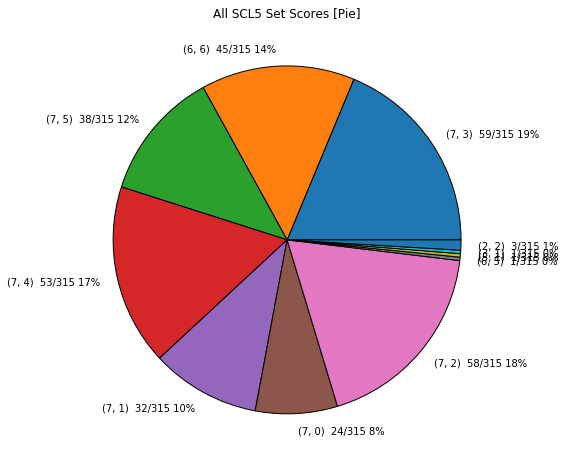

In [132]:
scl_set_scores_categorize(scl5_scl_sets, 'All SCL5 Set Scores [Pie]')

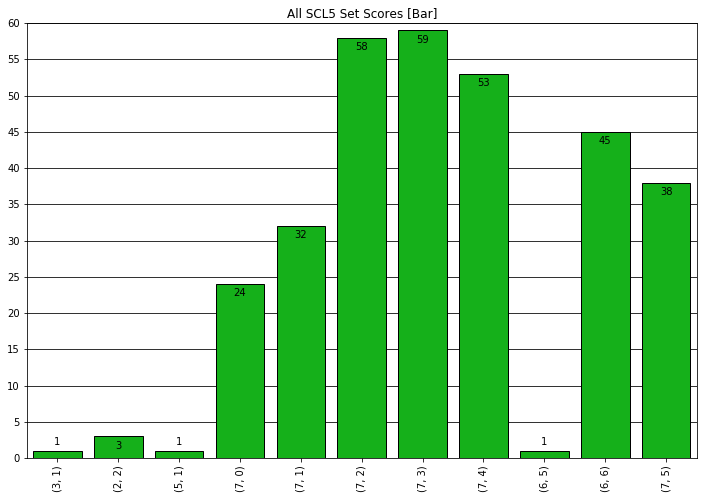

In [185]:
scl_set_scores_categorize(
    scl5_scl_sets,
    'All SCL5 Set Scores [Bar]',
    category_name_order=lambda s: sum(s),
    force_bar=True)

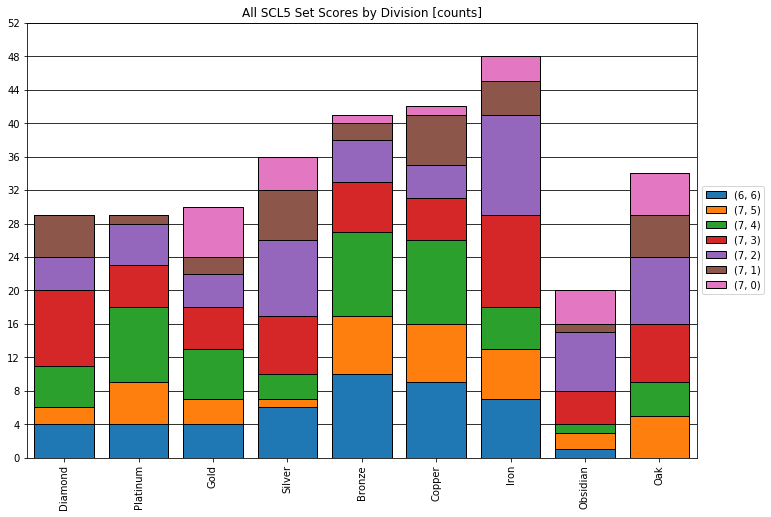

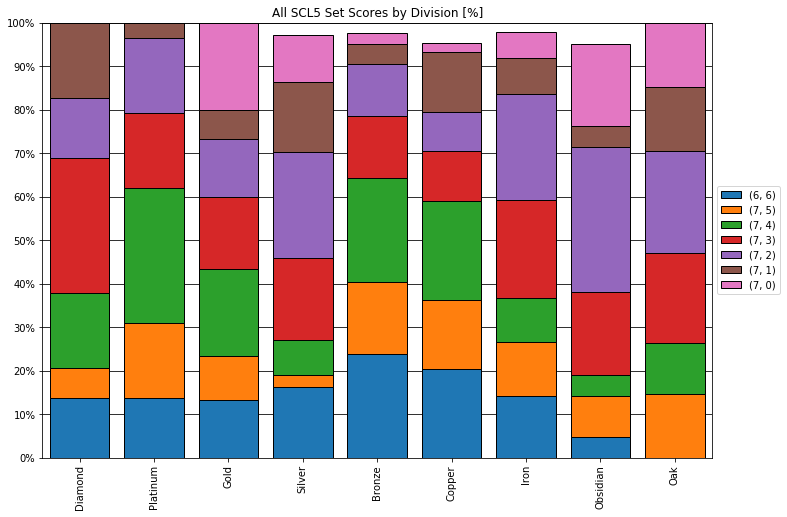

In [188]:
scl_set_scores_categorize(
    scl5_scl_sets,
    'All SCL5 Set Scores by Division',
    groupby=lambda s: s.division,
    data_stack_order = [(6,6),(7,5),(7,4),(7,3),(7,2),(7,1),(7,0)],
    category_name_order=lambda s: DIVISIONS.index(s),
)

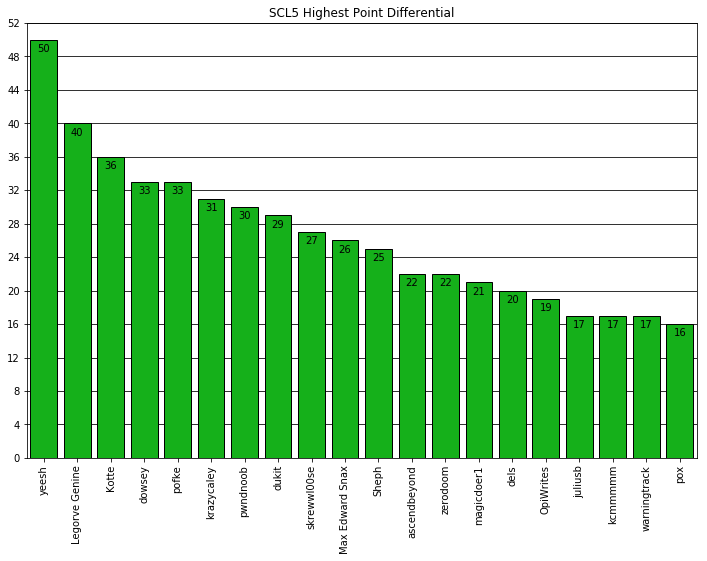

In [135]:
game_differential(
    scl5_scl_sets,
    'SCL5 Highest Point Differential',
    percentile_plot=False,
    reversed_data_sort=True,
    limit=20,
    category_data_order=sum,
)

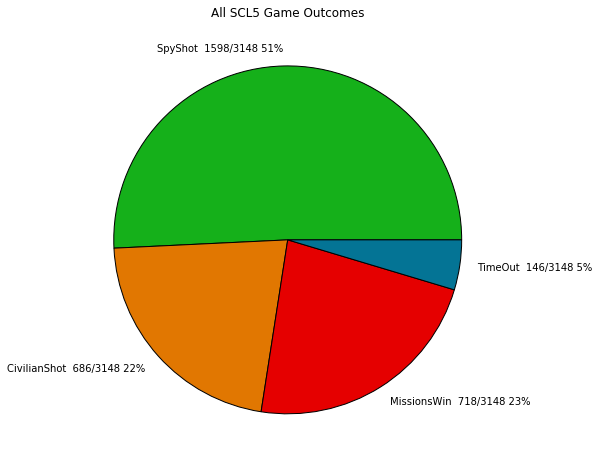

In [136]:
game_outcomes(scl5_replays, "All SCL5 Game Outcomes")

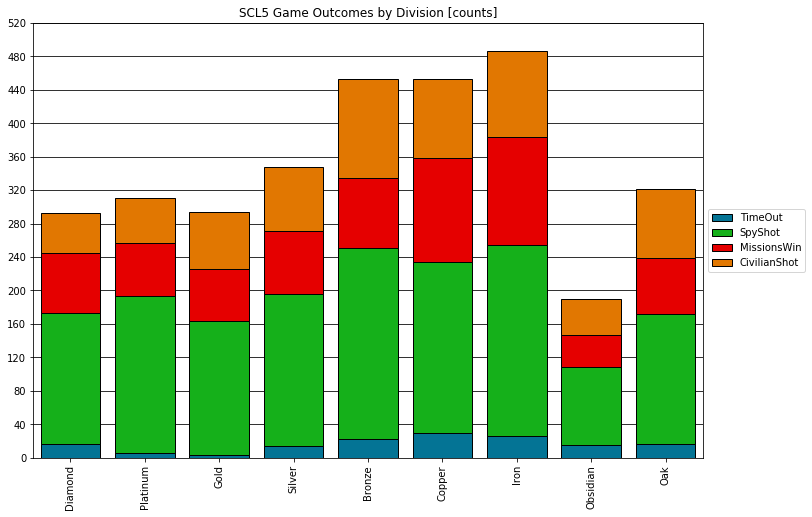

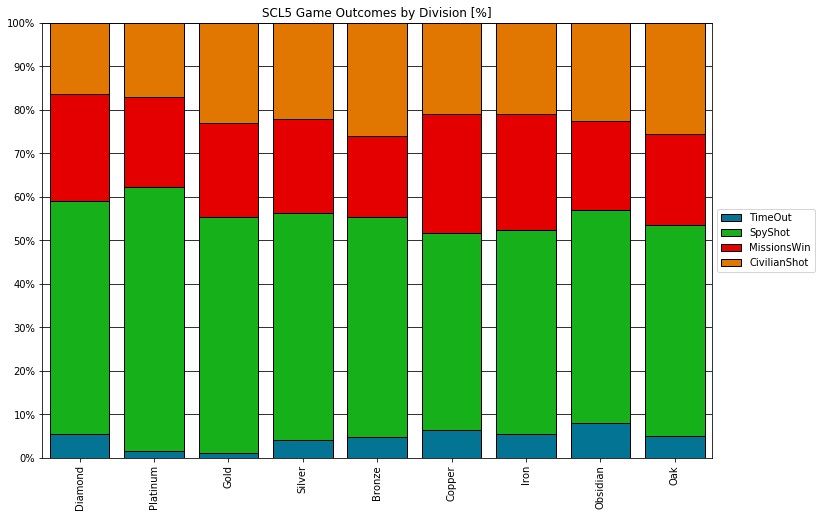

In [137]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Division",
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g))

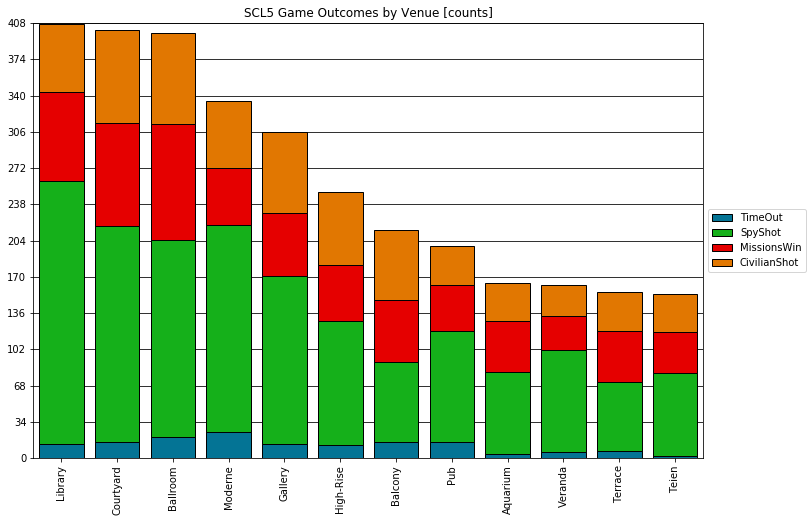

In [190]:
game_outcomes(scl5_replays,
    "SCL5 Game Outcomes by Venue",
    groupby=lambda g: g.venue,
    category_data_order=sum,
    percentile_plot=False)

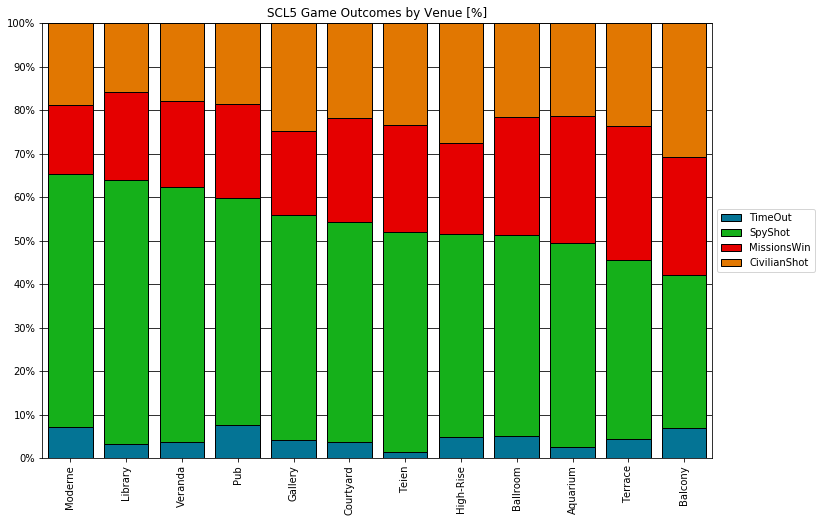

In [193]:
game_outcomes(scl5_replays,
    "SCL5 Game Outcomes by Venue",
    groupby=lambda g: g.venue,
    category_data_order=sort_by_spy_wins,
    counts_plot=False)

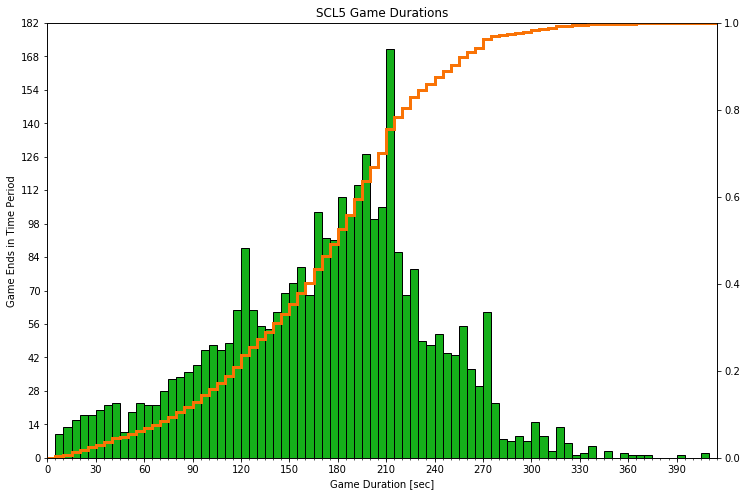

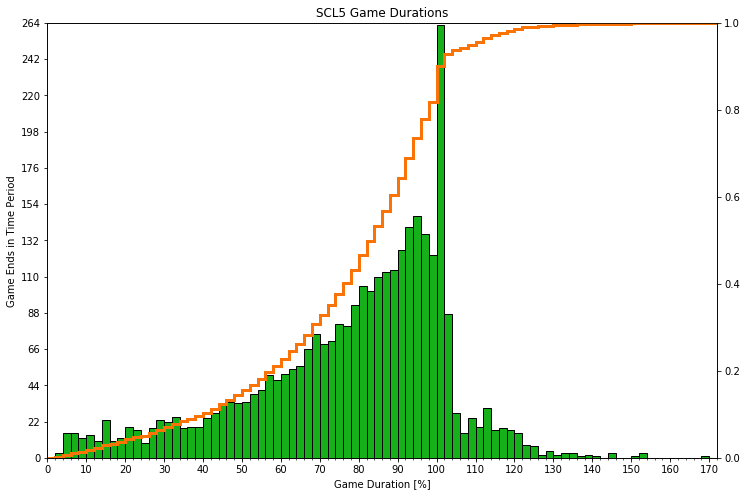

In [139]:
game_durations(scl5_replays, "SCL5 Game Durations")

In [140]:
def sort_by_spy_wins(data_dictionary, data_sum):
    matching = [x for c,x in data_dictionary.items() if c & WinType.SpyWin]
    if data_sum is not None:
        matching = [m/data_sum for m in matching]
    return sum(matching)

In [141]:
def sort_by_sniper_wins(data_dictionary, data_sum):
    matching = [x for c,x in data_dictionary.items() if c & WinType.SniperWin]
    if data_sum is not None:
        matching = [m/data_sum for m in matching]
    return sum(matching)

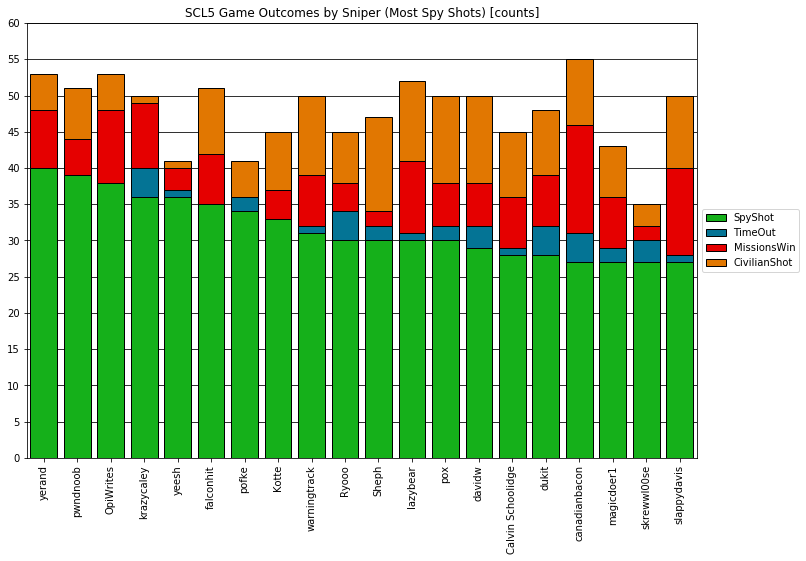

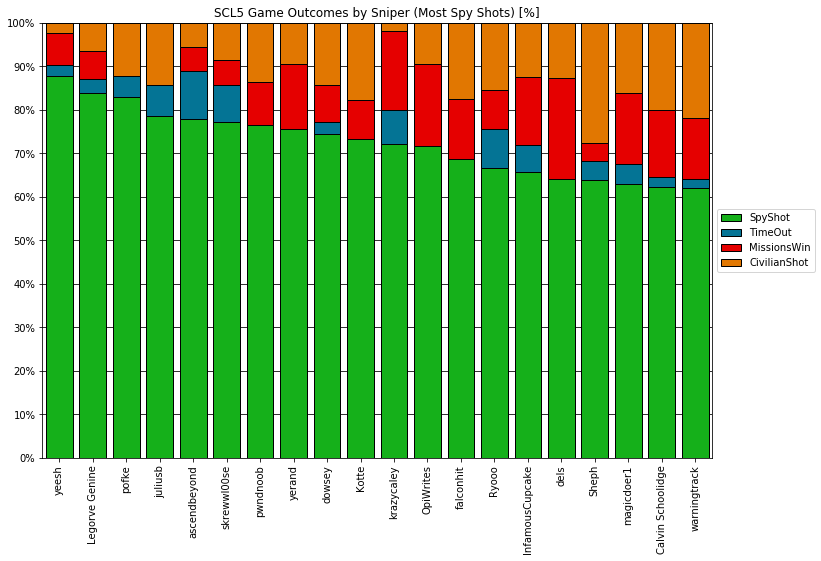

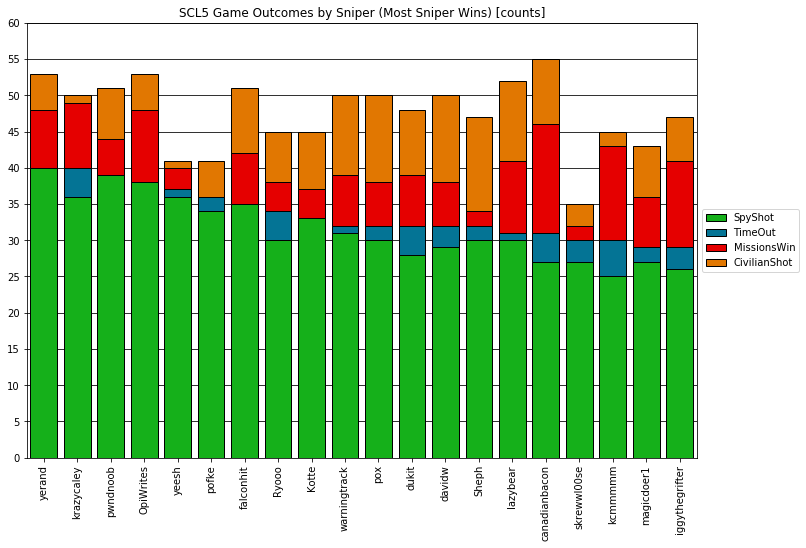

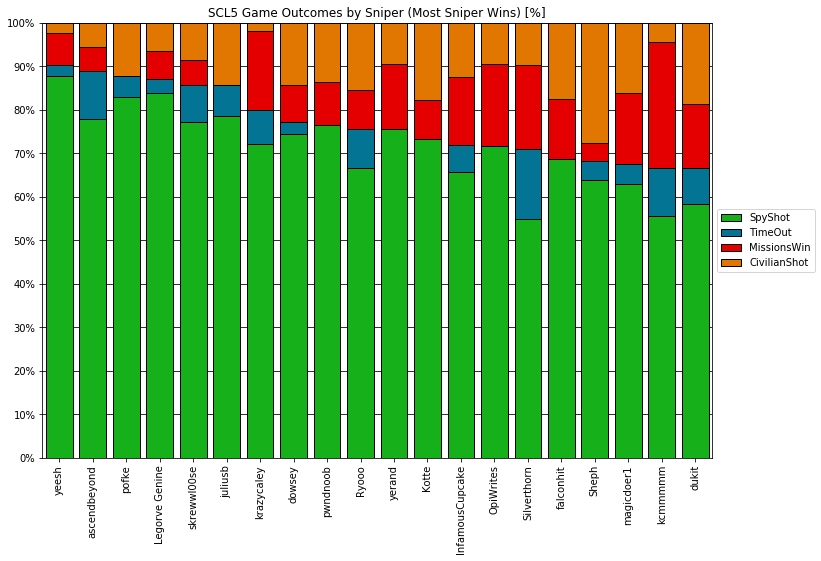

In [142]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Sniper (Most Spy Shots)",
    groupby=lambda g: g.sniper,
    category_data_order=WinType.SpyShot,
    data_stack_order = [WinType.SpyShot, WinType.TimeOut, WinType.MissionsWin, WinType.CivilianShot],
    limit=20
)
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Sniper (Most Sniper Wins)",
    groupby=lambda g: g.sniper,
    category_data_order=sort_by_sniper_wins,
    data_stack_order = [WinType.SpyShot, WinType.TimeOut, WinType.MissionsWin, WinType.CivilianShot],
    reversed_data_sort=True,
    limit=20
)

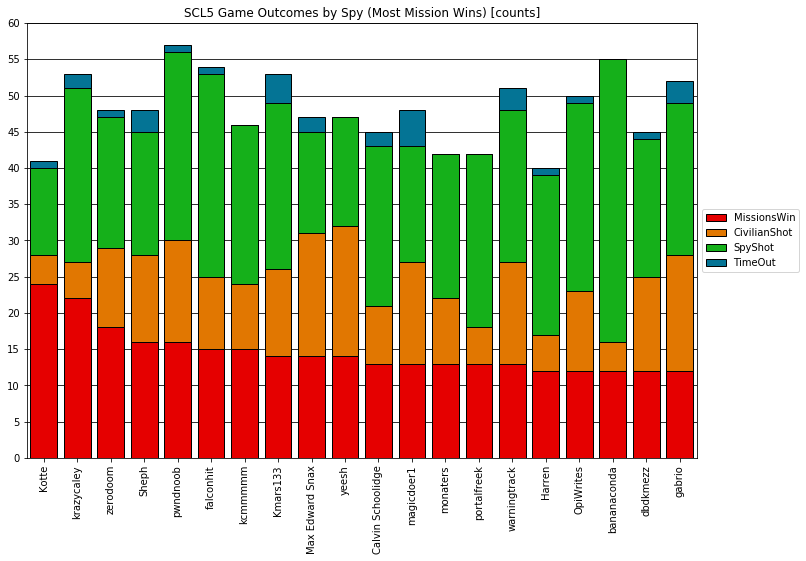

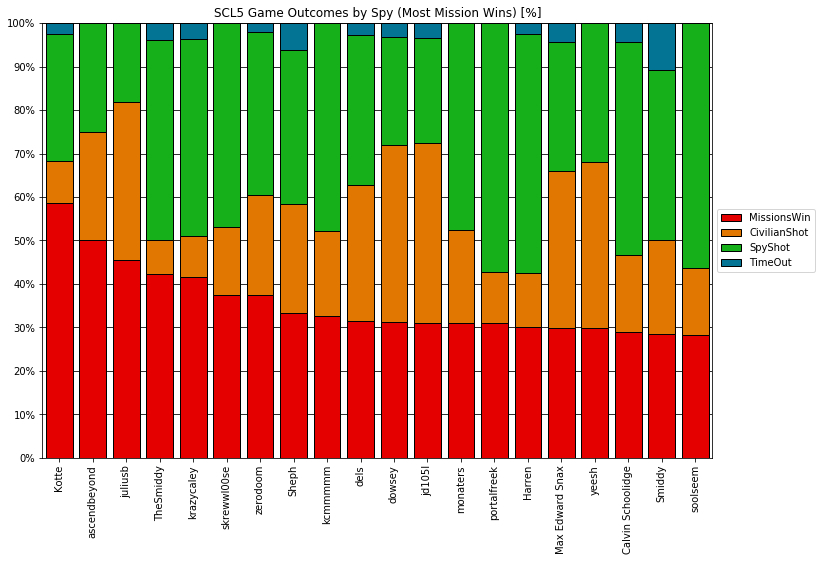

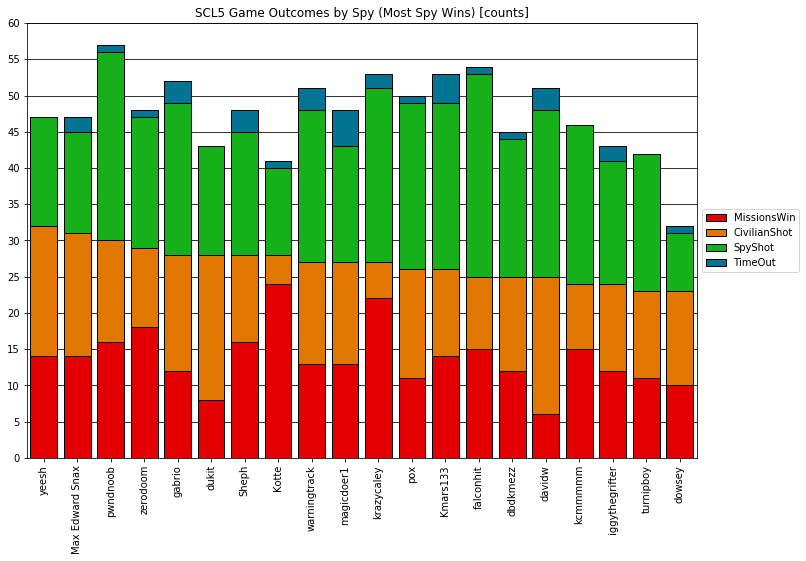

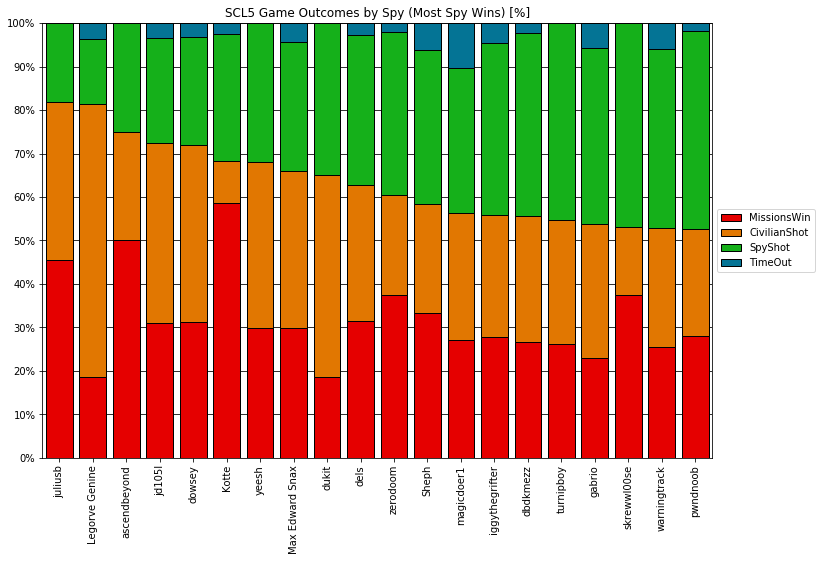

In [143]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Spy (Most Mission Wins)",
    groupby=lambda g: g.spy,
    category_data_order=WinType.MissionsWin,
    data_stack_order = [WinType.MissionsWin, WinType.CivilianShot, WinType.SpyShot, WinType.TimeOut],
    limit=20
)
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Spy (Most Spy Wins)",
    groupby=lambda g: g.spy,
    category_data_order=sort_by_spy_wins,
    data_stack_order = [WinType.MissionsWin, WinType.CivilianShot, WinType.SpyShot, WinType.TimeOut],
    reversed_data_sort=True,
    limit=20
)

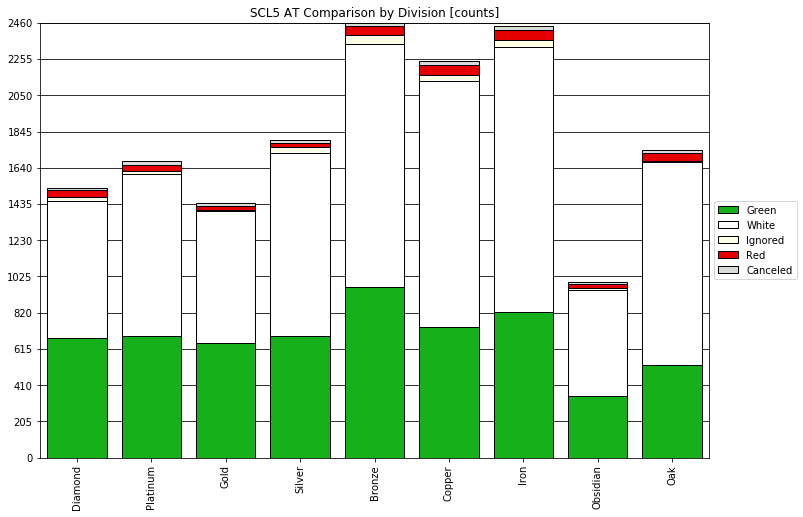

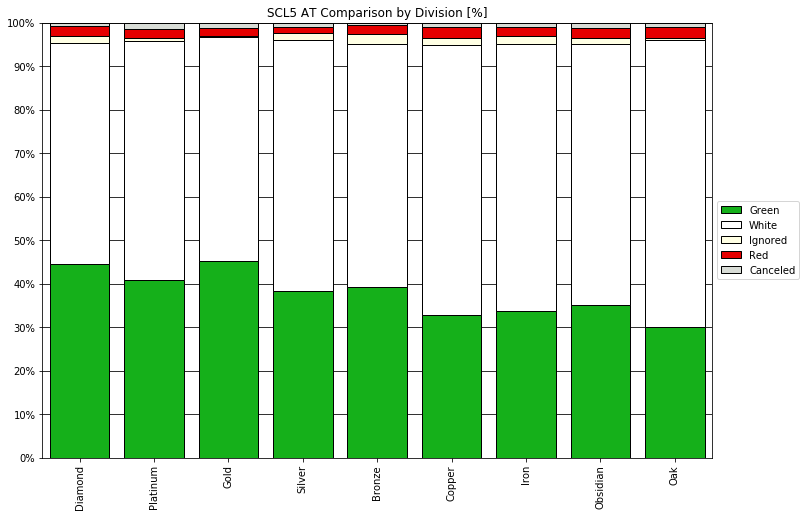

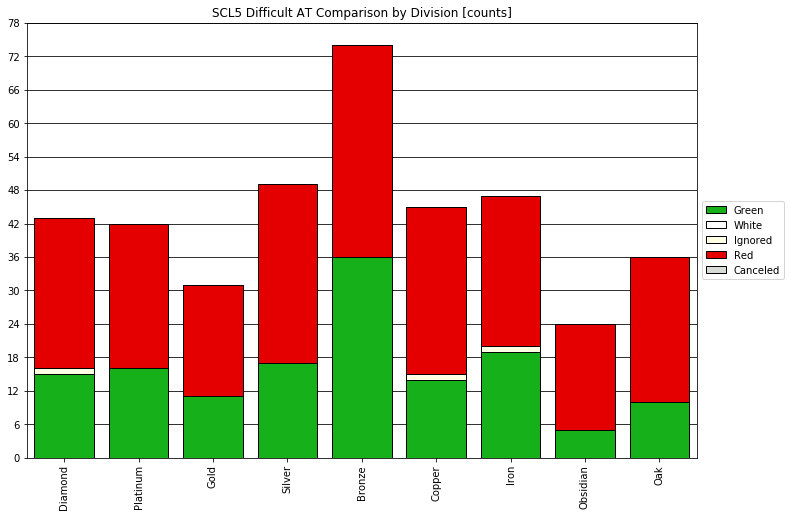

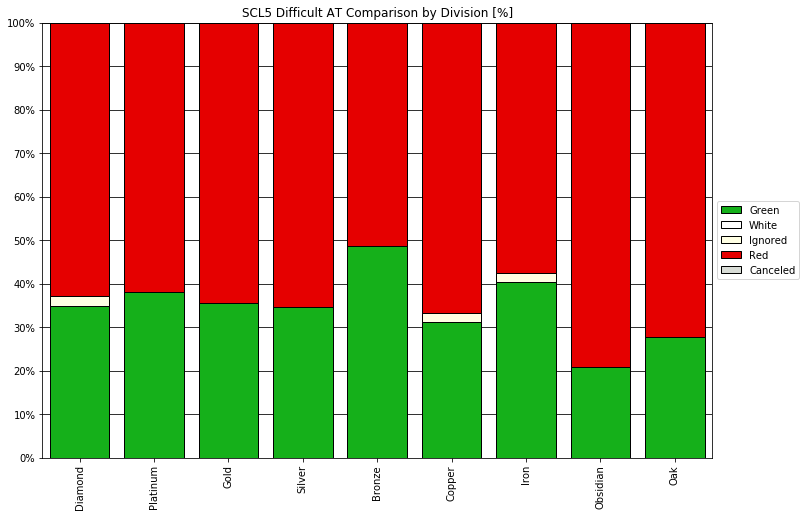

In [144]:
action_test_percentages(
    scl5_replays,
    'SCL5 AT Comparison by Division',
    groupby=lambda g: g.division,
    category_name_order=lambda s: DIVISIONS.index(s),
)
diff_action_test_percentages(
    scl5_replays,
    'SCL5 Difficult AT Comparison by Division',
    groupby=lambda g: g.division,
    category_name_order=lambda s: DIVISIONS.index(s),
)

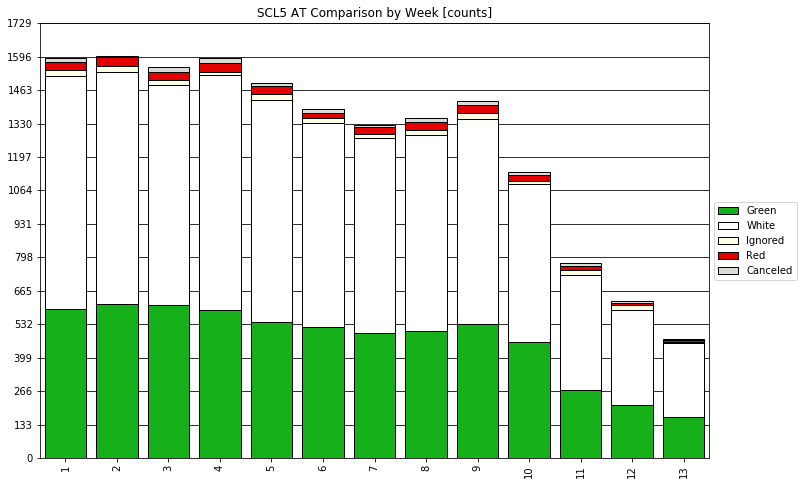

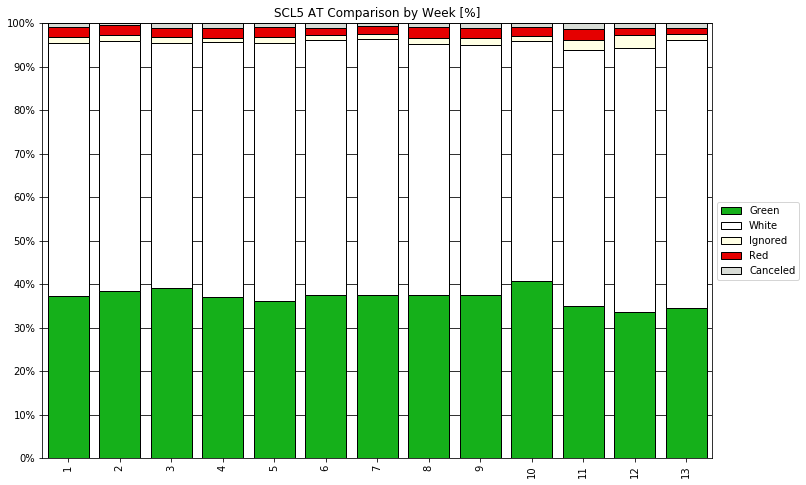

In [145]:
action_test_percentages(
    scl5_replays,
    'SCL5 AT Comparison by Week',
    groupby=lambda g: g.week,
)

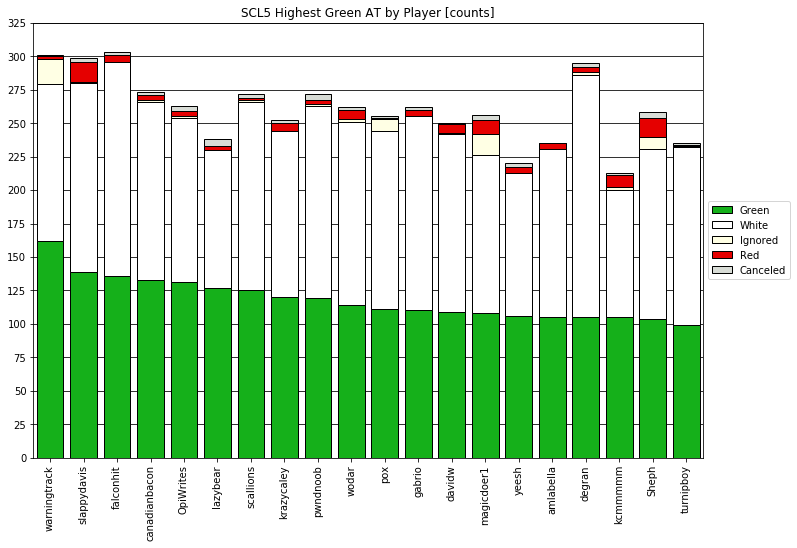

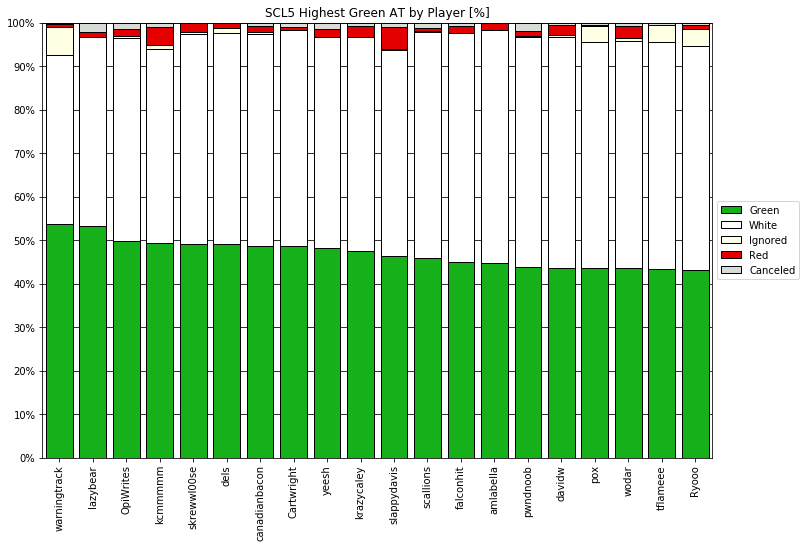

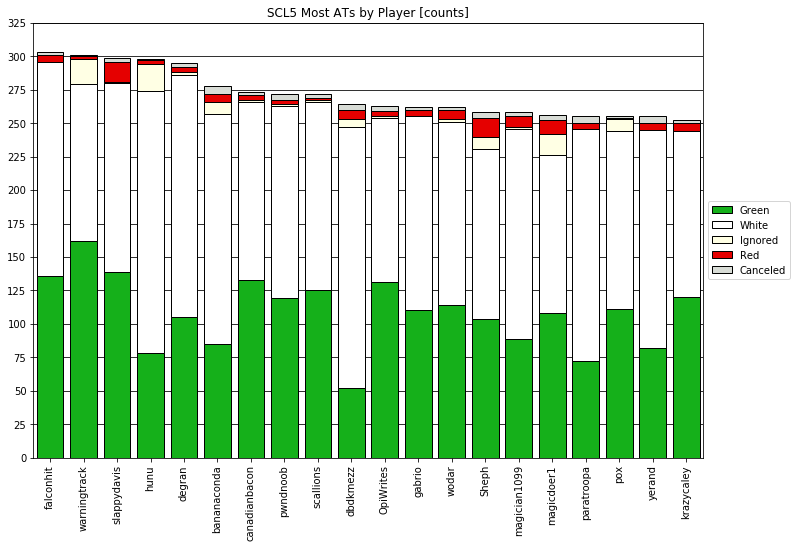

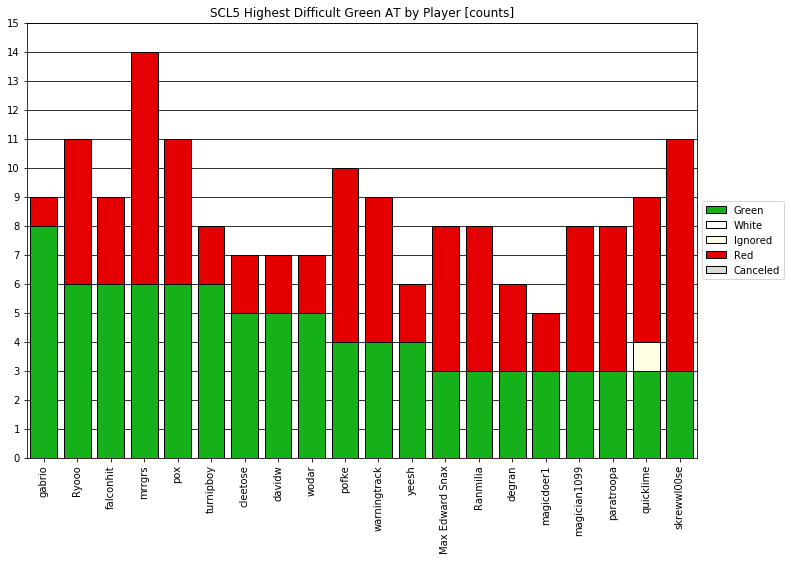

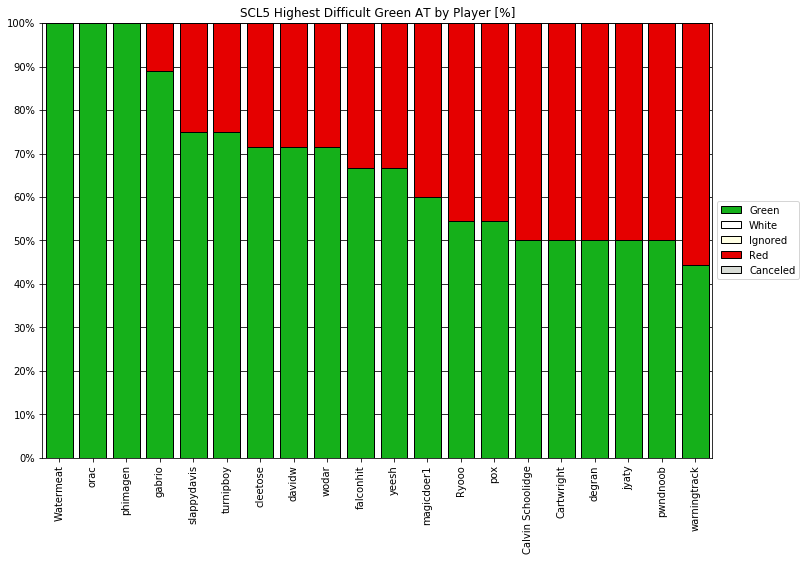

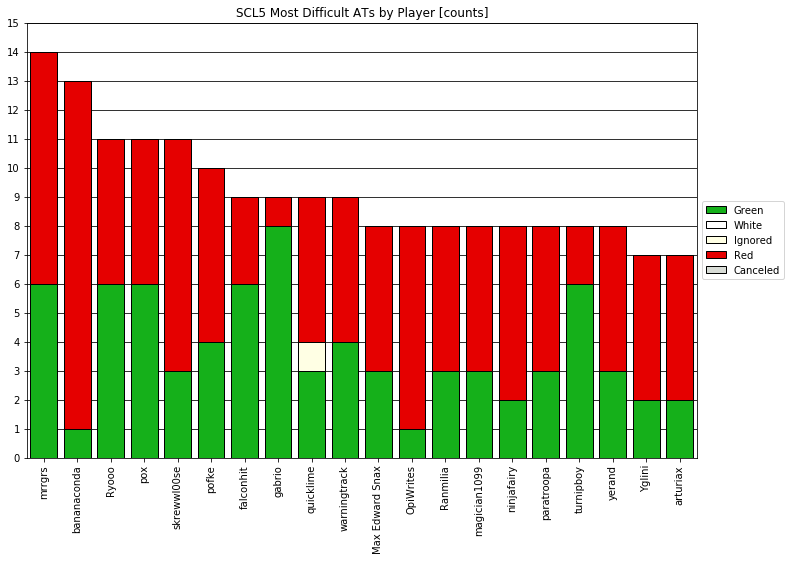

In [146]:
action_test_percentages(
    scl5_replays,
    'SCL5 Highest Green AT by Player',
    groupby=lambda g: g.spy,
    category_data_order=ActionTest.Green,
    limit=20
)
action_test_percentages(
    scl5_replays,
    'SCL5 Most ATs by Player',
    groupby=lambda g: g.spy,
    category_data_order=sum,
    limit=20,
    percentile_plot=False
)
diff_action_test_percentages(
    scl5_replays,
    'SCL5 Highest Difficult Green AT by Player',
    groupby=lambda g: g.spy,
    category_data_order=ActionTest.Green,
    limit=20
)
diff_action_test_percentages(
    scl5_replays,
    'SCL5 Most Difficult ATs by Player',
    groupby=lambda g: g.spy,
    category_data_order=sum,
    limit=20,
    percentile_plot=False
)

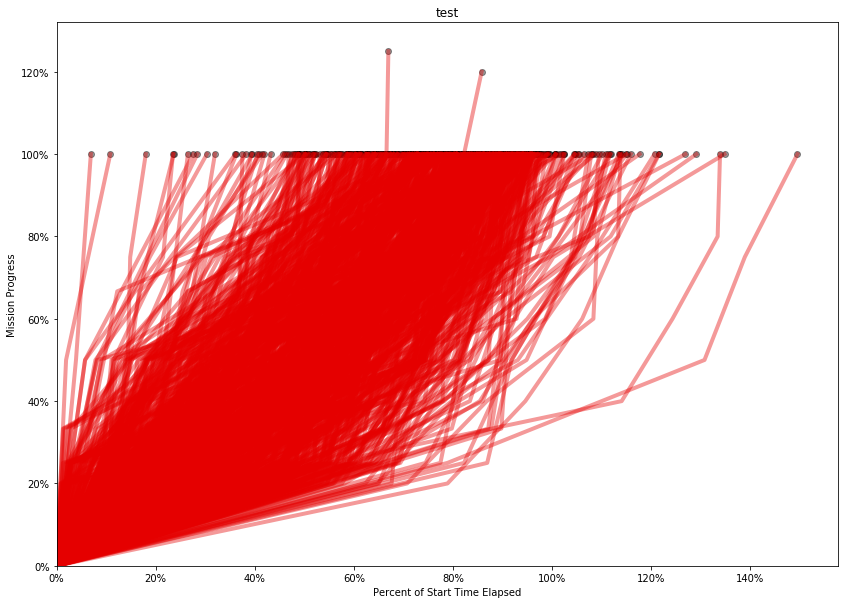

In [147]:
mission_progress(filter(lambda g: g.win_type == WinType.MissionsWin, scl5_replays), 'test')

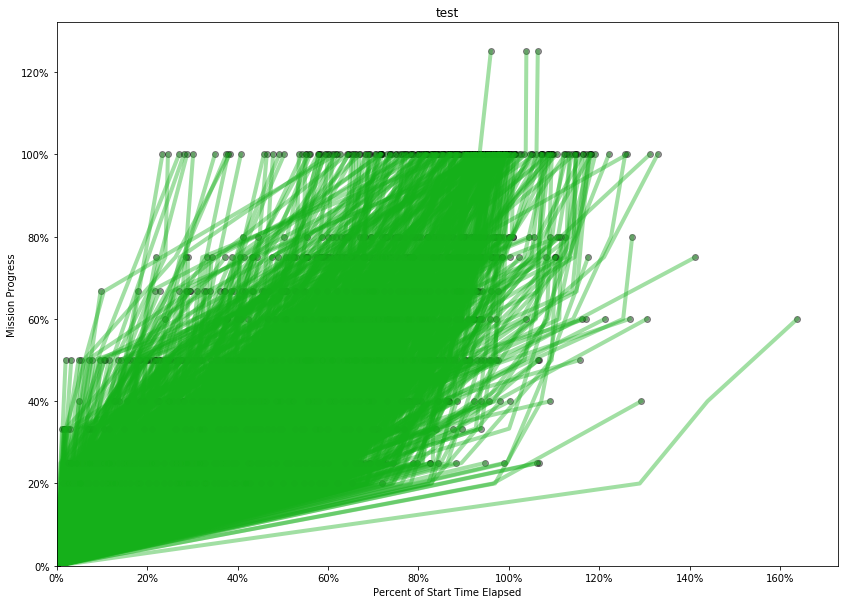

In [148]:
mission_progress(filter(lambda g: g.win_type == WinType.SpyShot, scl5_replays), 'test')

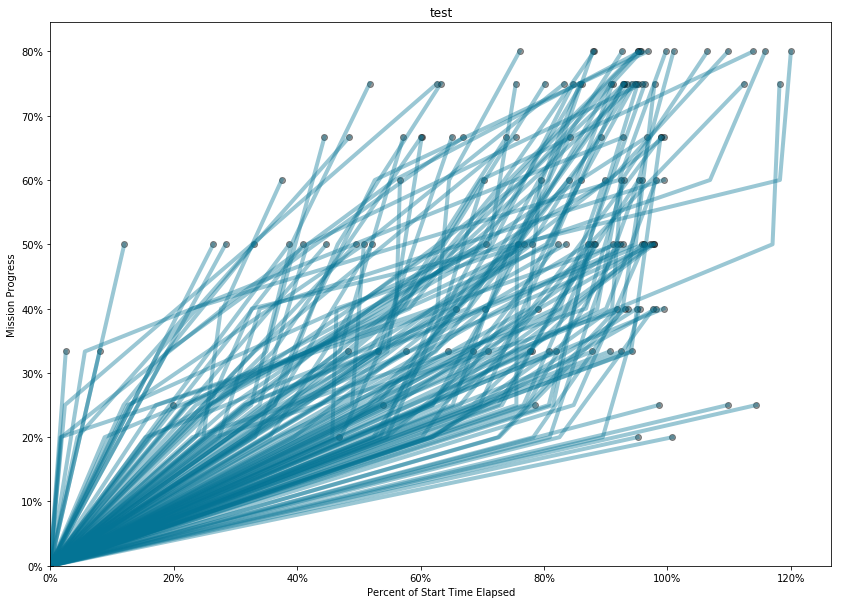

In [149]:
mission_progress(filter(lambda g: g.win_type == WinType.TimeOut, scl5_replays), 'test')

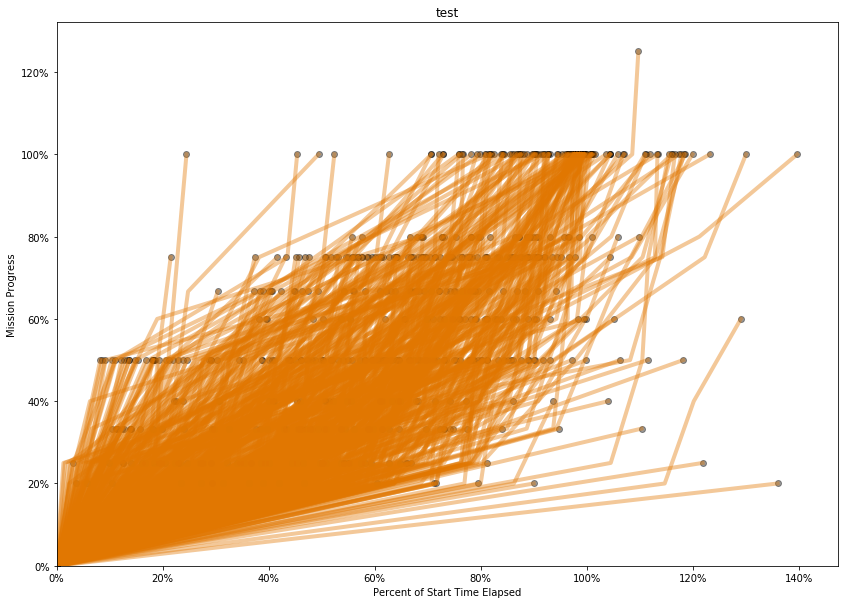

In [150]:
mission_progress(filter(lambda g: g.win_type == WinType.CivilianShot, scl5_replays), 'test')

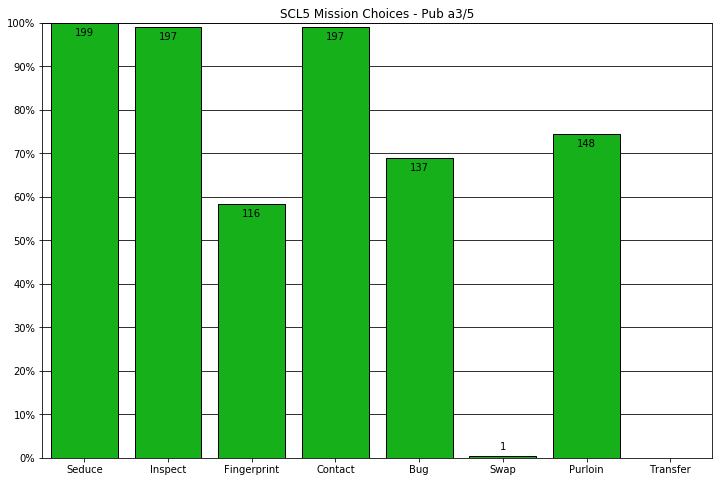

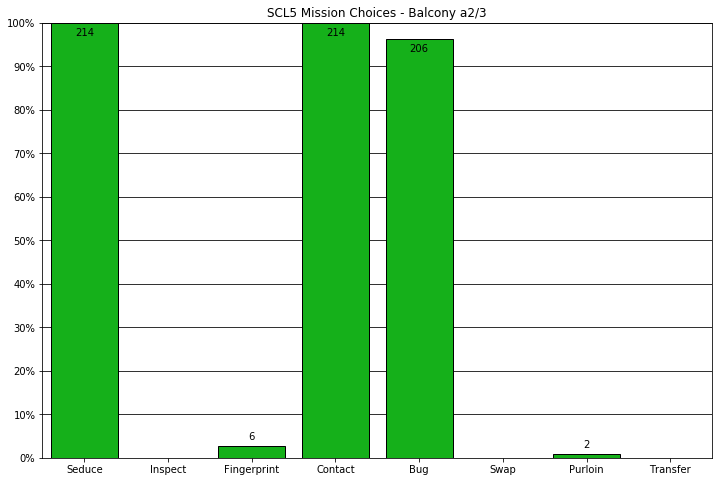

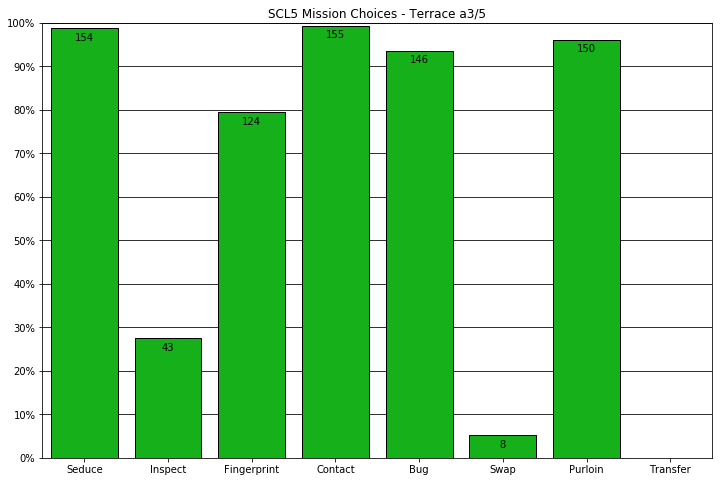

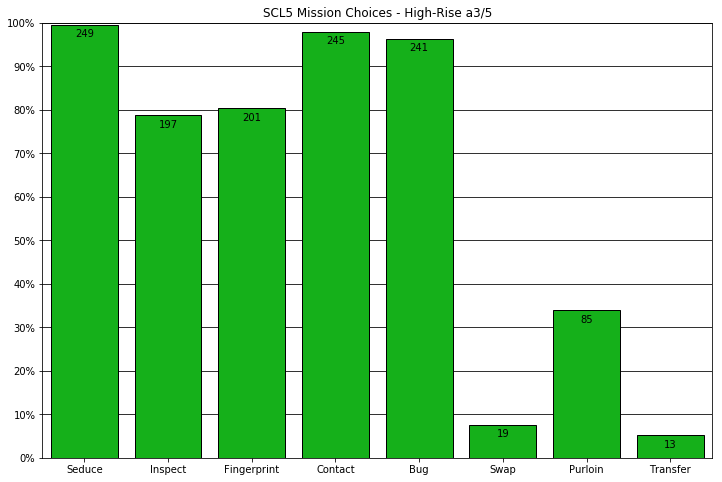

In [151]:
print_mission_choices(scl5_replays, "SCL5 Mission Choices", SCL5_PICK_MODES)

In [152]:
def sort_char_spy_wins(data_dictionary, data_sum):
    matching = [x for c,x in data_dictionary.values() if c & WinType.SpyWin]
    if data_sum is not None:
        matching = [m/data_sum for m in matching]
    return sum(matching)

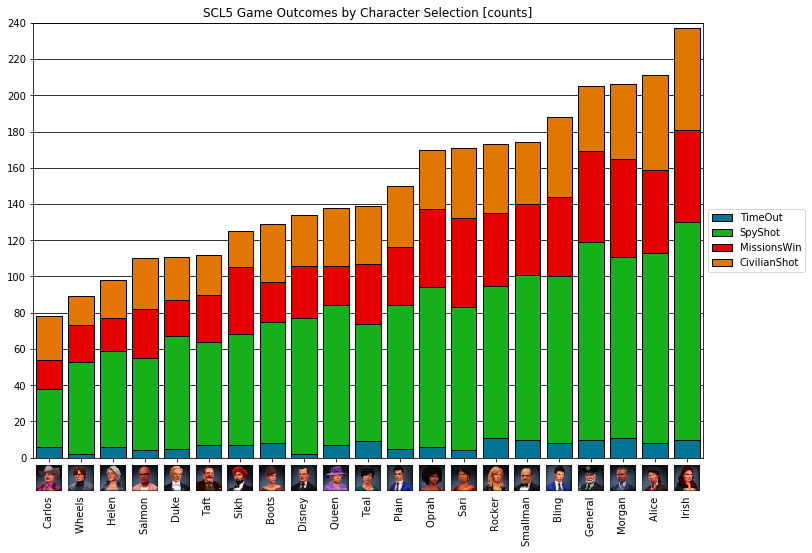

In [197]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Character Selection",
    groupby=lambda g: determine_role(g, Roles.Spy),
    category_data_order=sum,
    portrait_x_axis=True,
    reversed_data_sort=True,
    percentile_plot=False
)

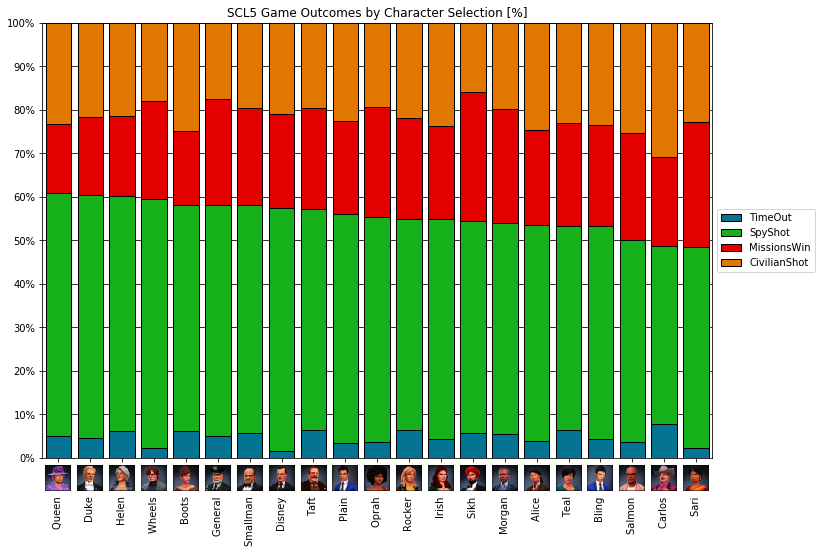

In [199]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Character Selection",
    groupby=lambda g: determine_role(g, Roles.Spy),
    category_data_order=sort_by_spy_wins,
    portrait_x_axis=True,
    counts_plot=False
)

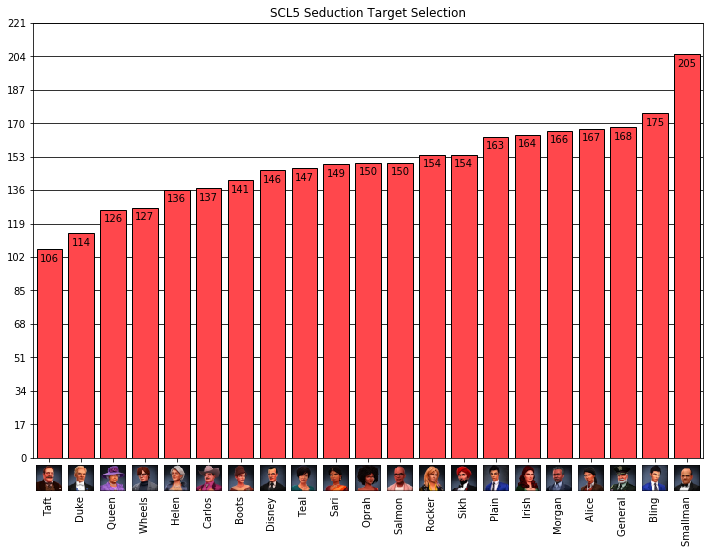

In [155]:
st_selection(scl5_replays, "SCL5 Seduction Target Selection", percentile_plot=False, category_data_order=sum)

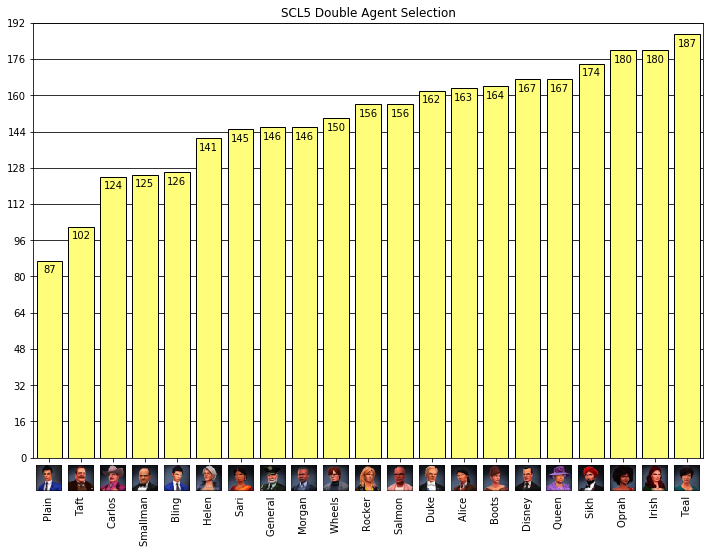

In [156]:
double_agent_selection(scl5_replays, "SCL5 Double Agent Selection", percentile_plot=False, category_data_order=sum)

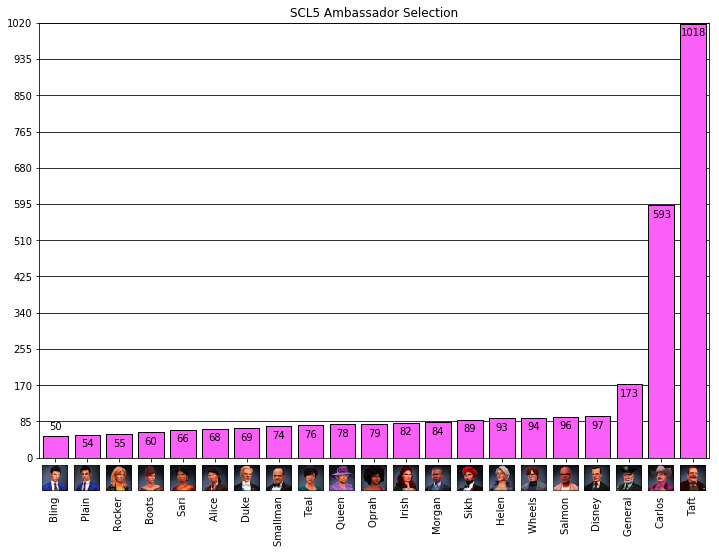

In [157]:
amba_selection(scl5_replays, "SCL5 Ambassador Selection", percentile_plot=False, category_data_order=sum)

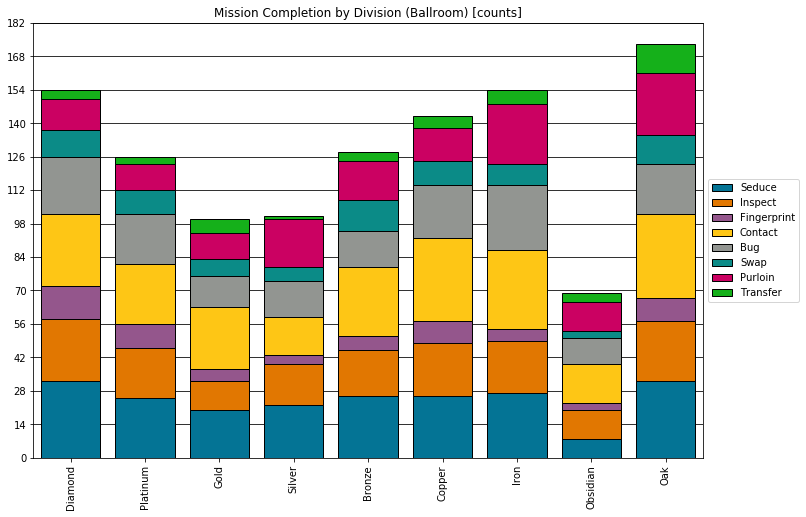

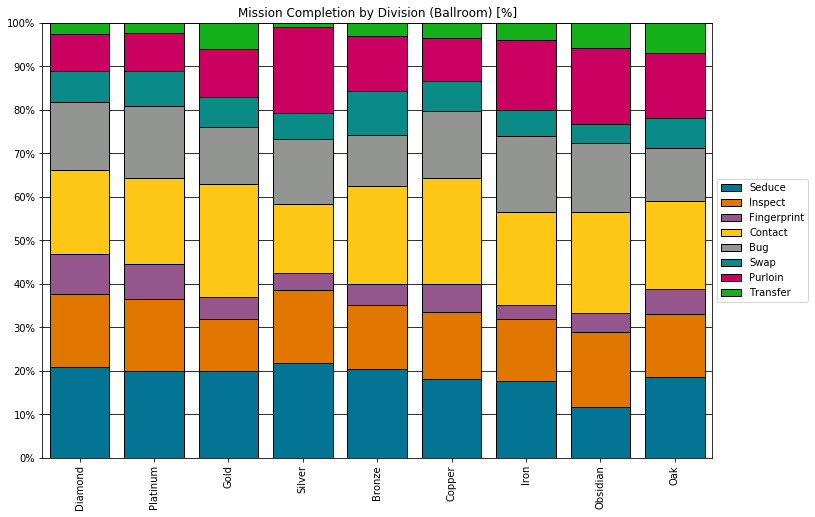

In [207]:
venue = 'Ballroom'
scl5_mode_replays = list(filter(lambda g: g.event == 'SCL5' and g.venue==venue, scl5_replays))

mission_completion_query(
    scl5_mode_replays,
    f"Mission Completion by Division ({venue})",
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g)
)

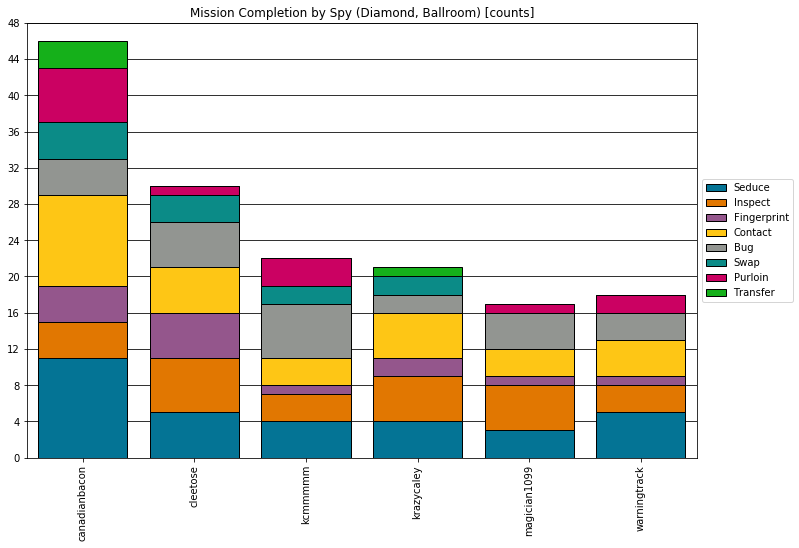

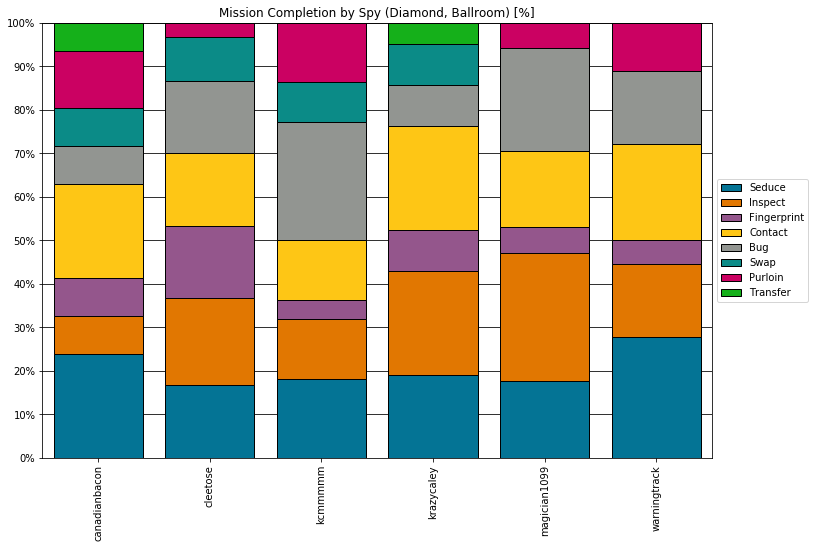

In [159]:
scl5_mode_replays = list(filter(lambda g: g.event == 'SCL5' and g.division == "Diamond" and g.venue=='Ballroom', scl5_replays))

mission_completion_query(
    scl5_mode_replays,
    "Mission Completion by Spy (Diamond, Ballroom)",
    groupby=lambda g: g.spy,
)

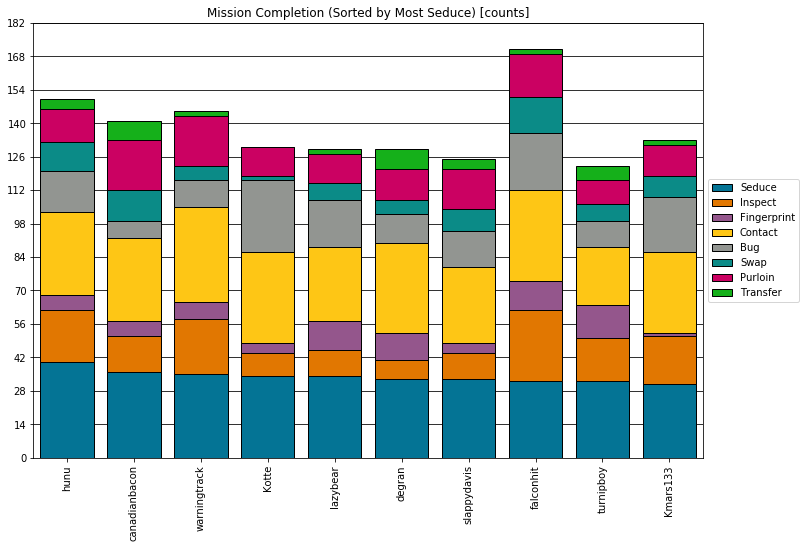

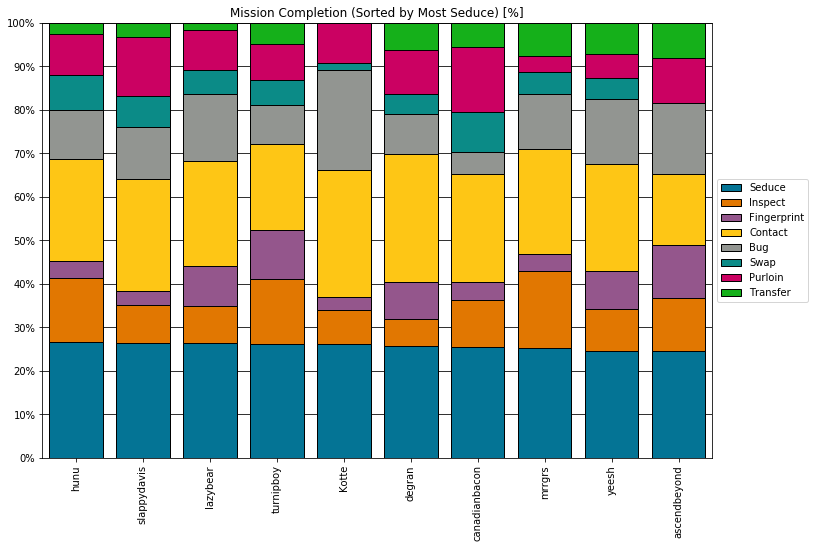

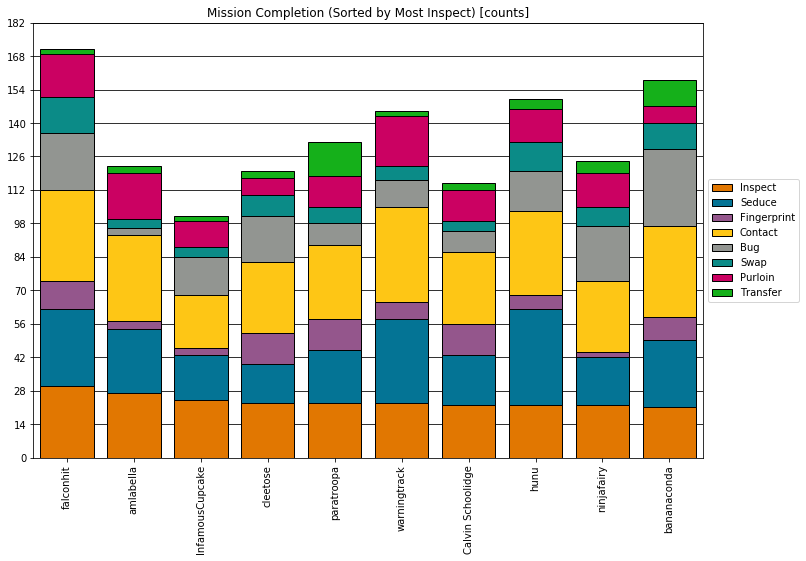

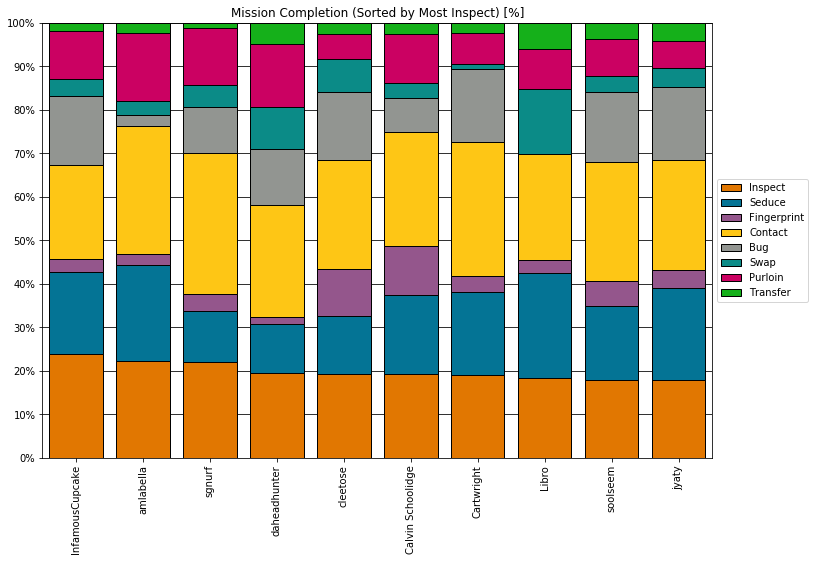

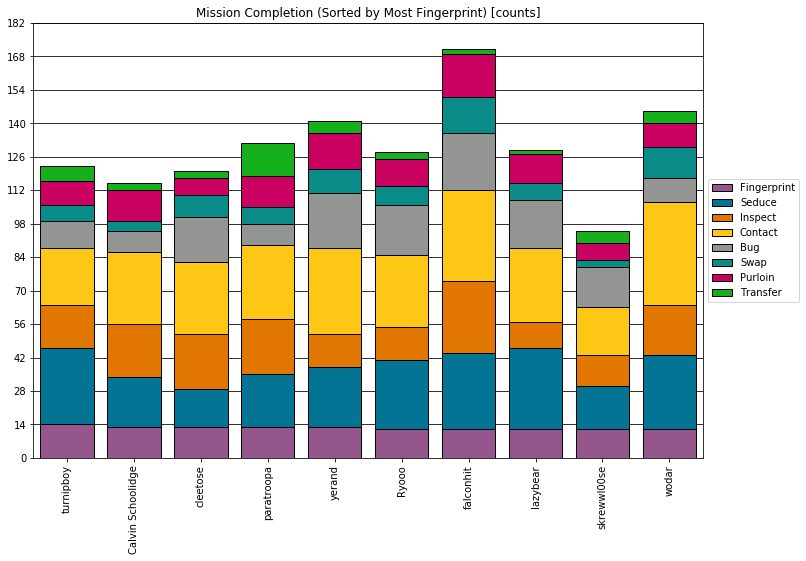

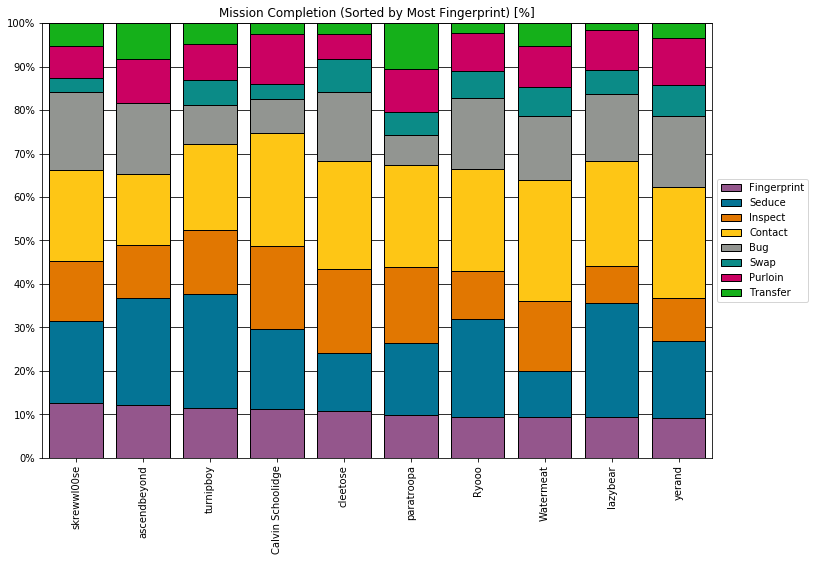

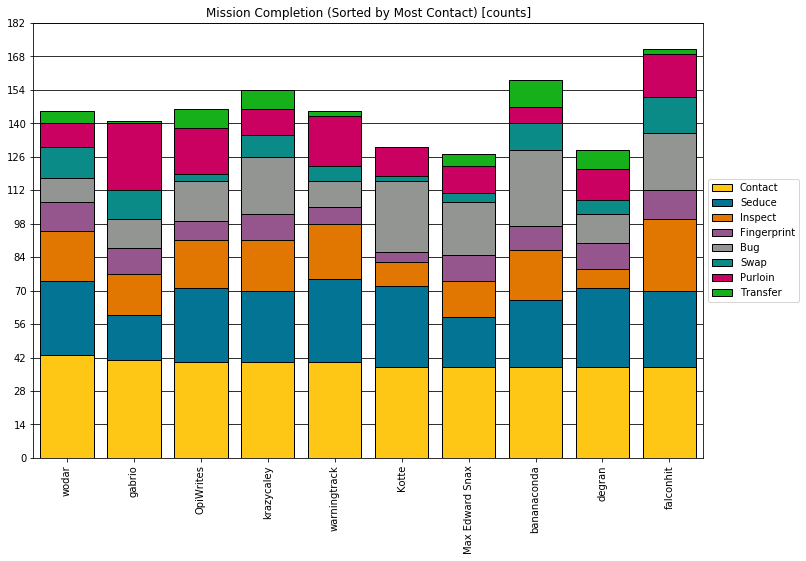

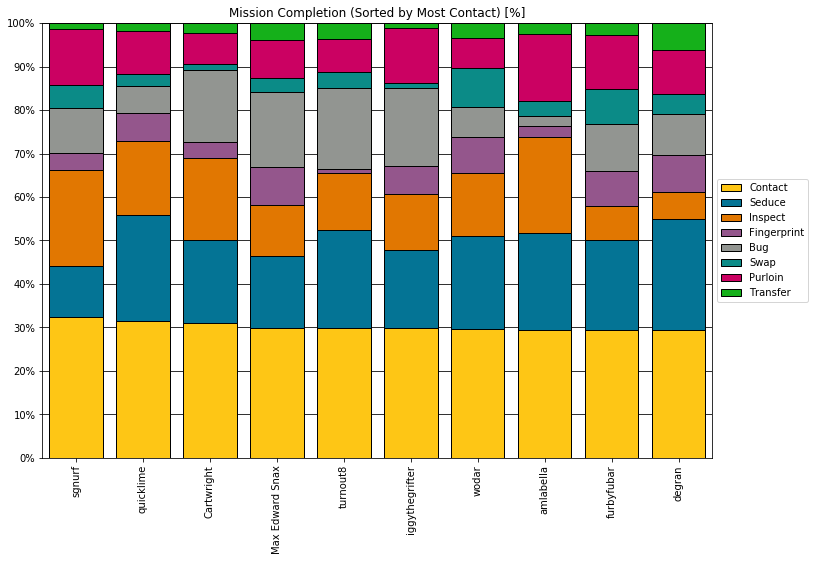

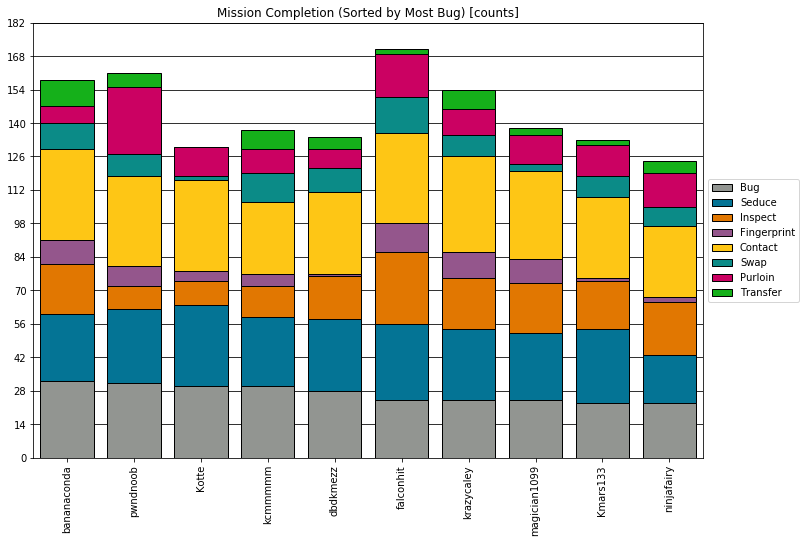

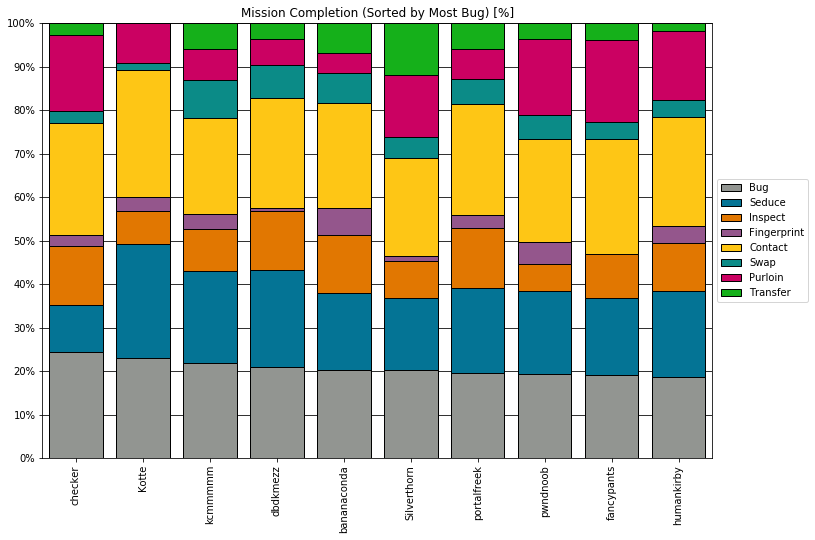

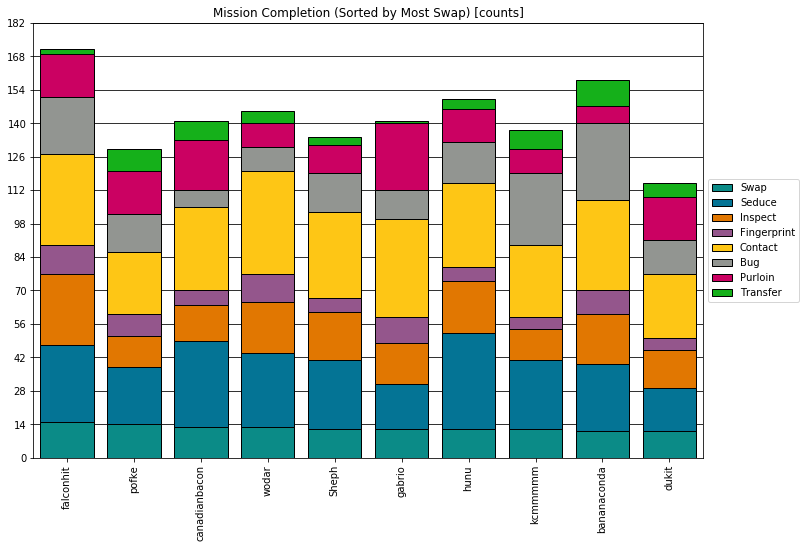

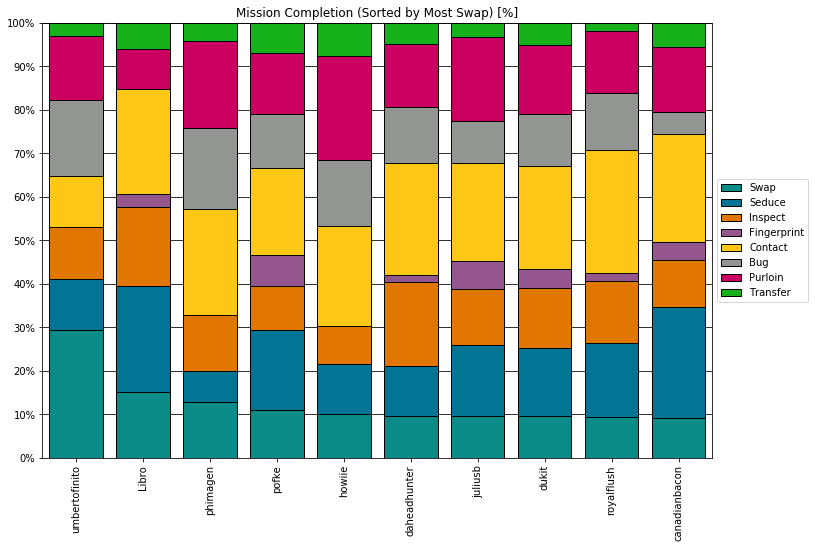

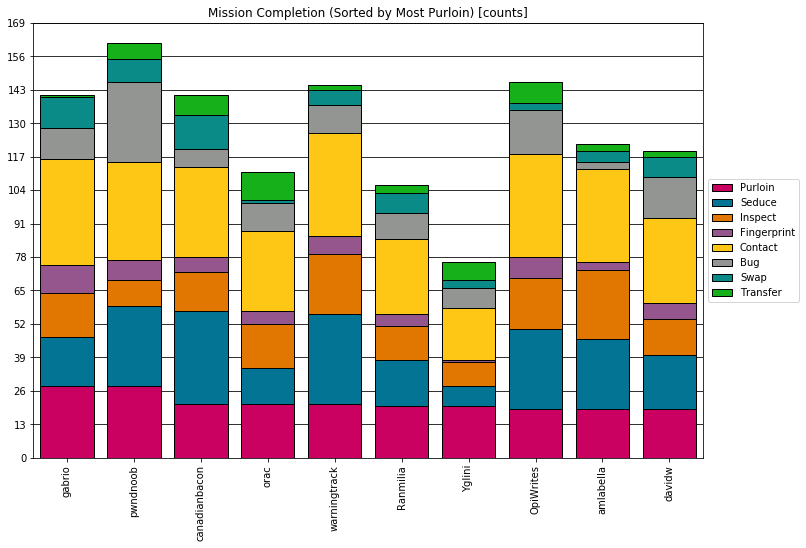

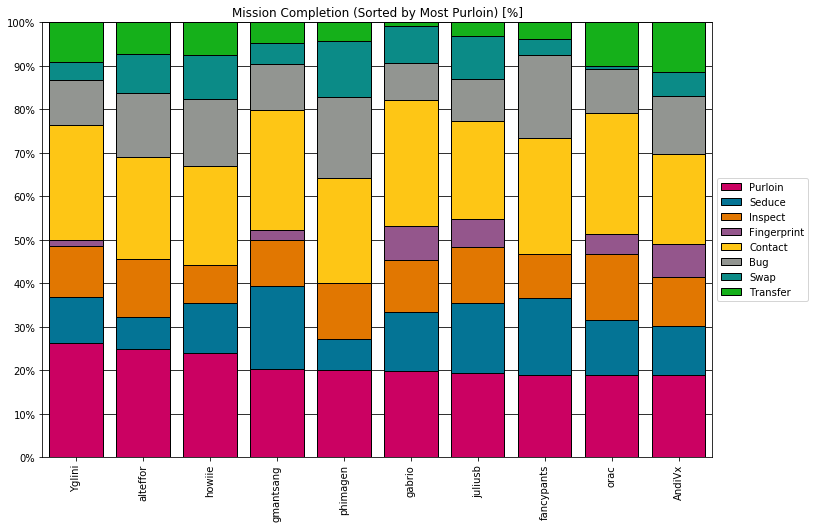

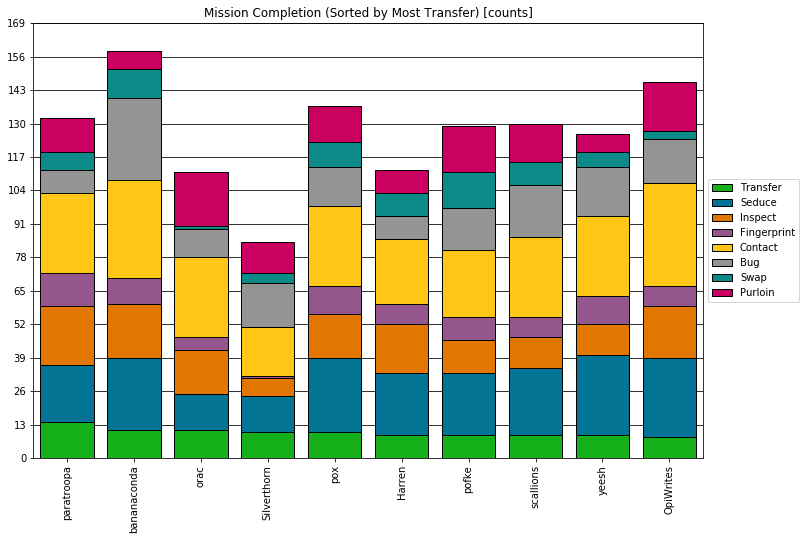

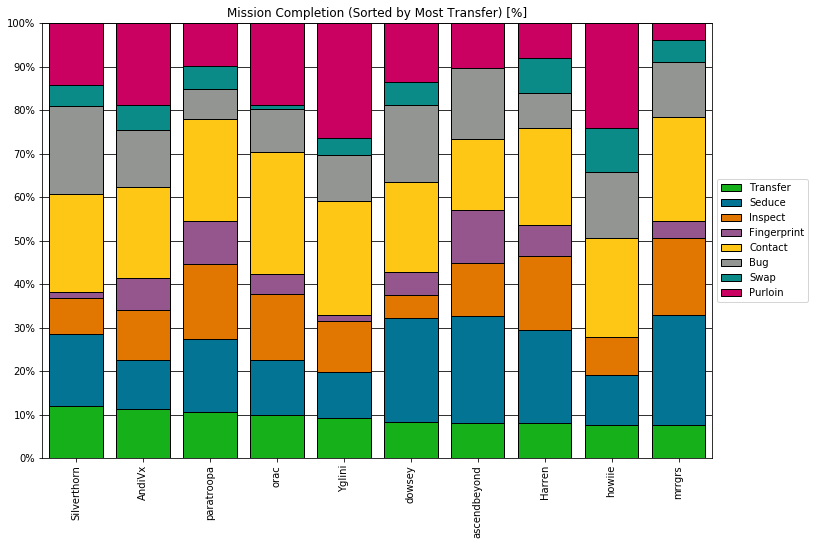

In [160]:
for m in Missions:
    if m != Missions.Zero:
        mission_completion_query(
            scl5_replays,
            f"Mission Completion (Sorted by Most {m.name})",
            groupby=lambda g: g.spy,
            category_data_order = m,
            data_stack_order = sorted([__m for __m in Missions if __m != Missions.Zero], key=lambda _m: _m != m),
            limit=10,
        )

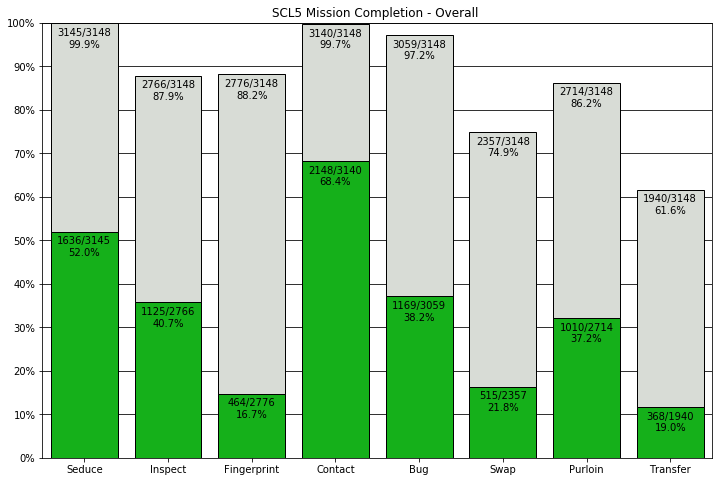

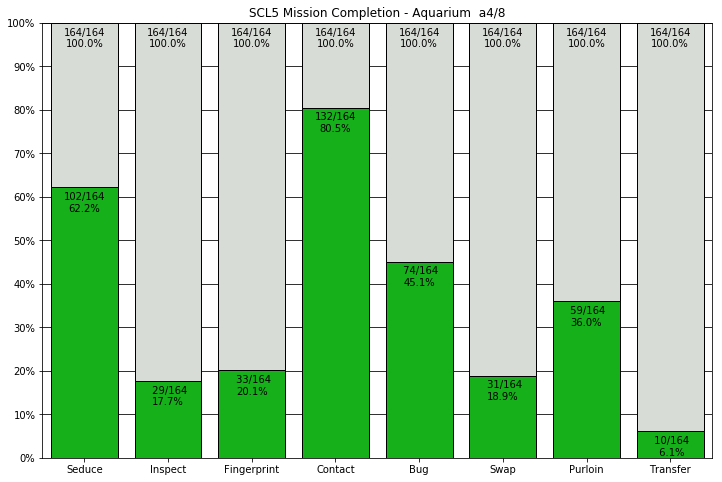

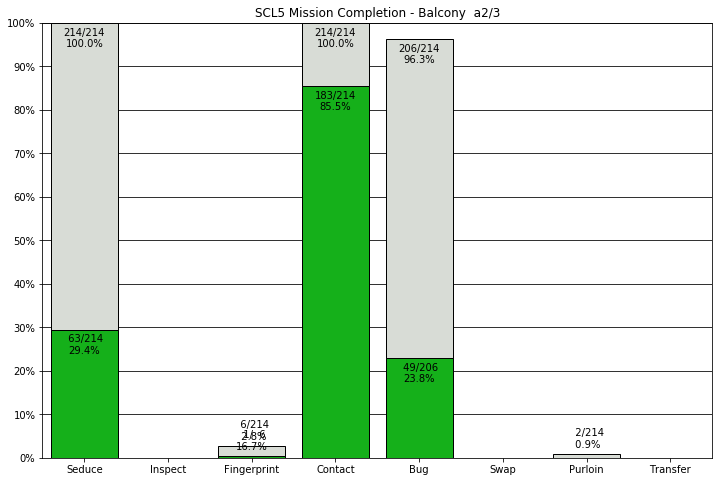

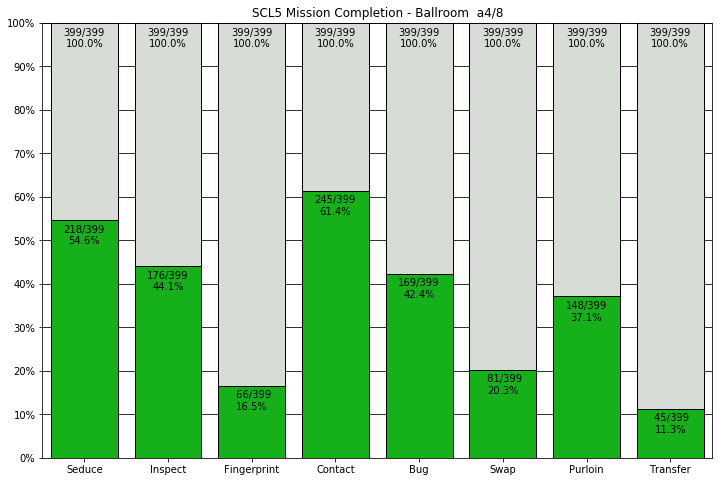

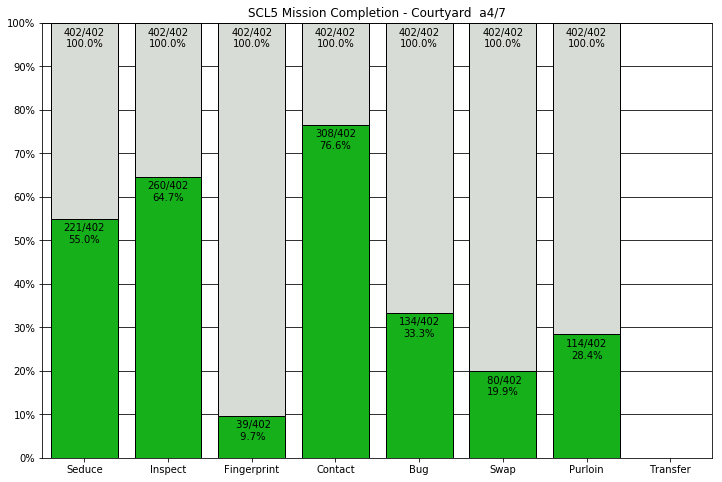

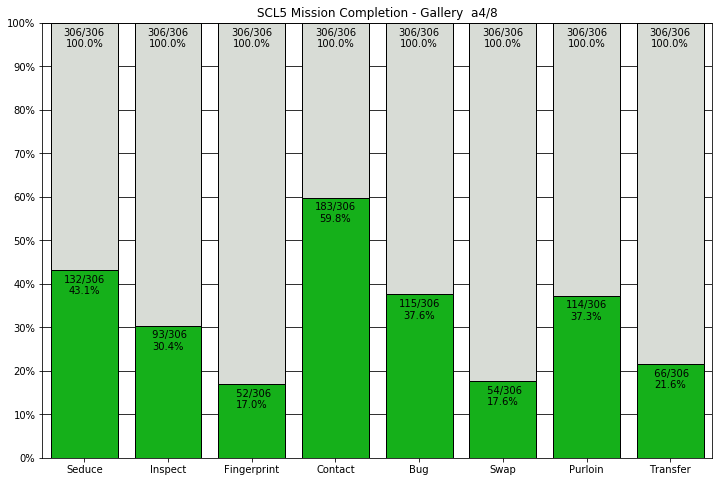

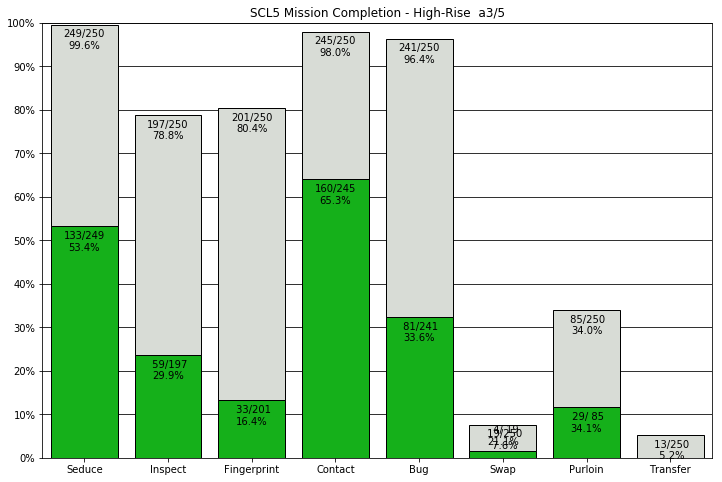

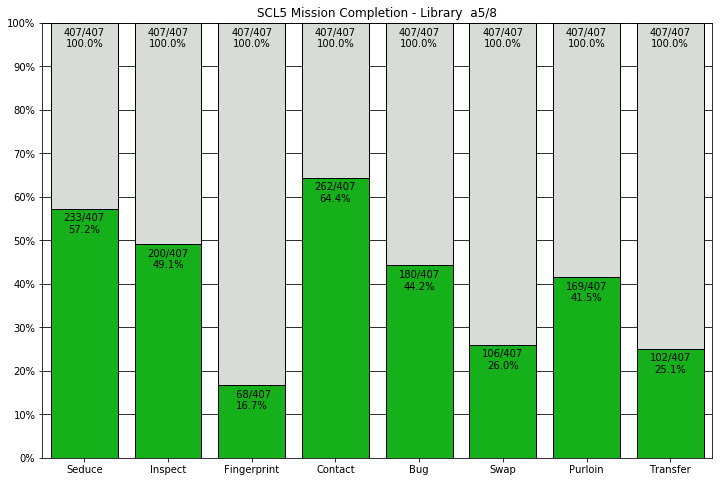

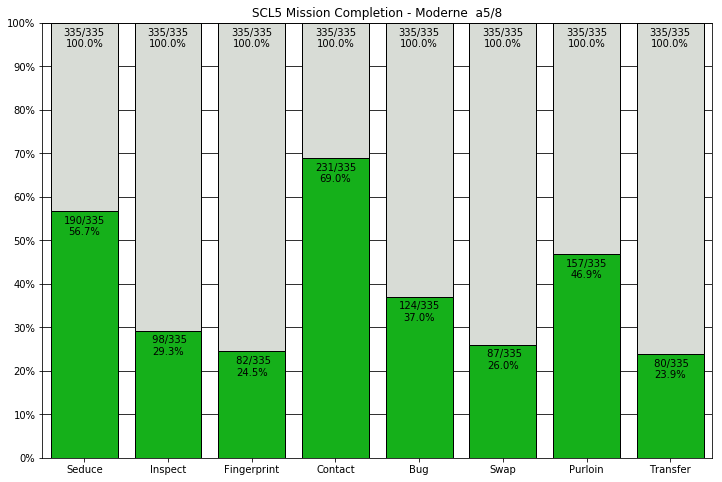

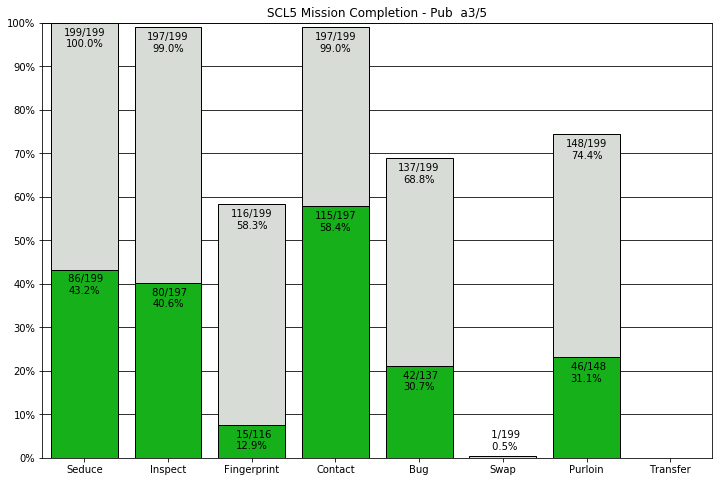

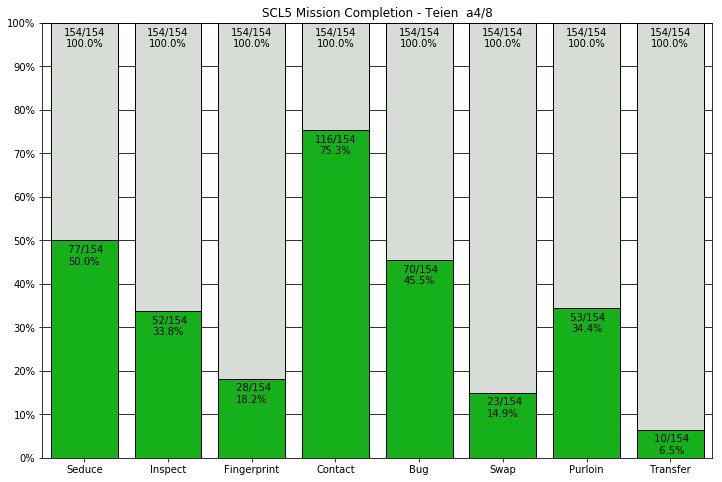

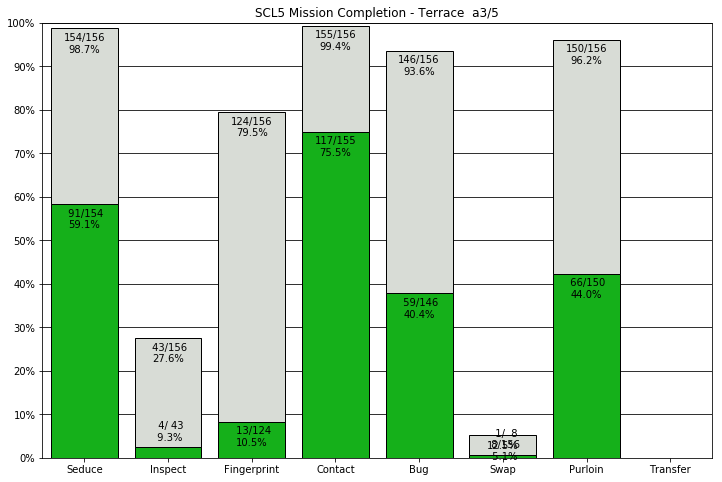

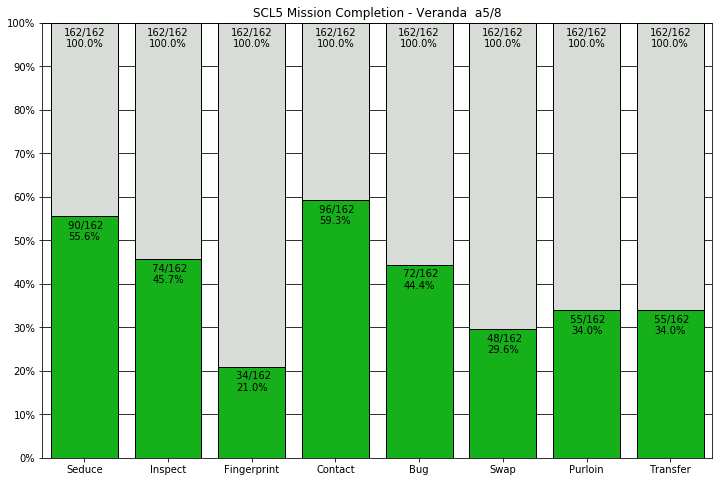

In [161]:
mission_completion(scl5_replays, "SCL5 Mission Completion", SCL5_VENUE_MODES)

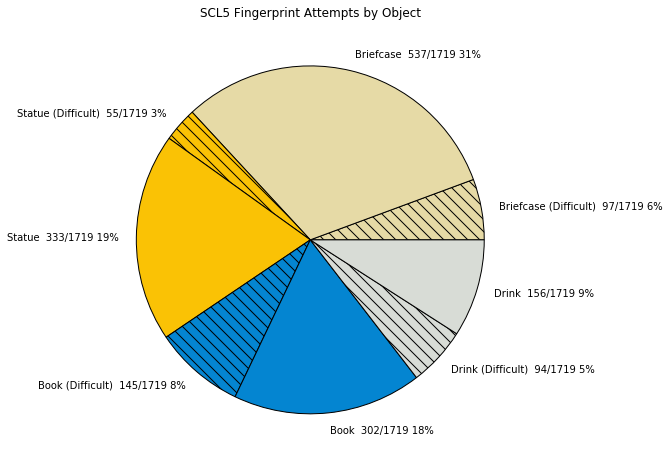

In [220]:
attempted_fingerprint_sources(scl5_replays, "SCL5 Fingerprint Attempts by Object")

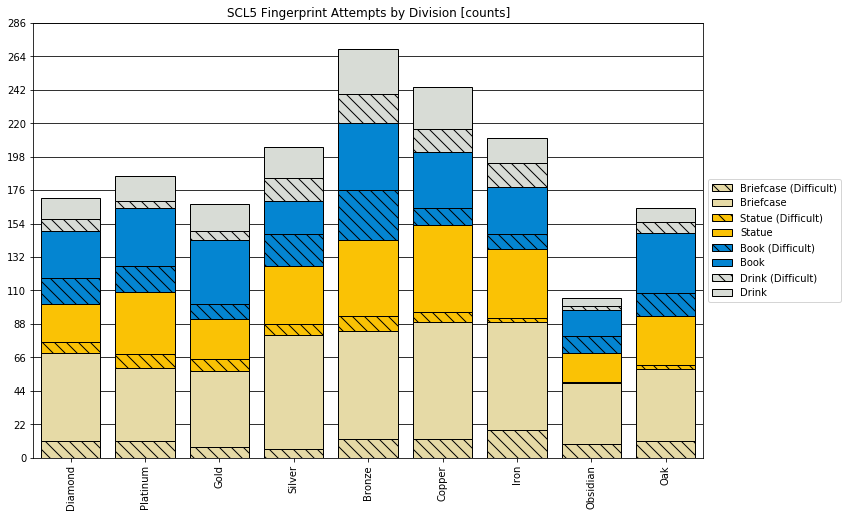

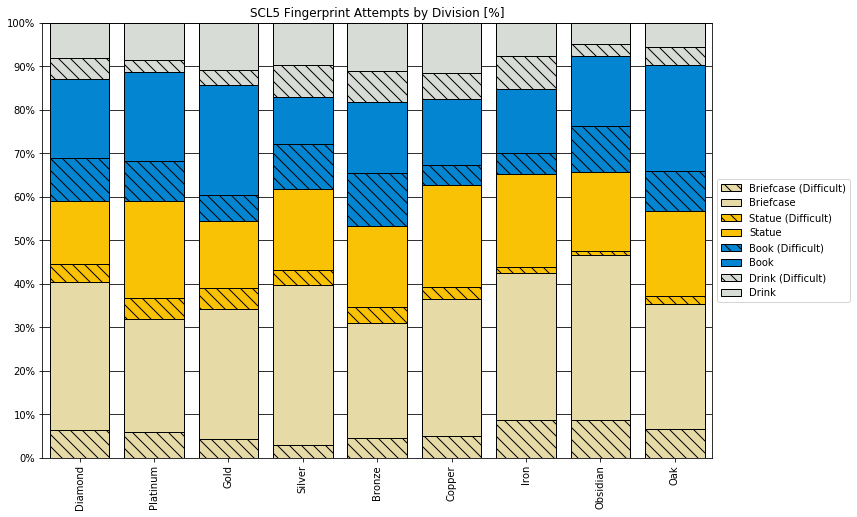

In [221]:
attempted_fingerprint_sources(
    scl5_replays,
    "SCL5 Fingerprint Attempts by Division",
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g)
)

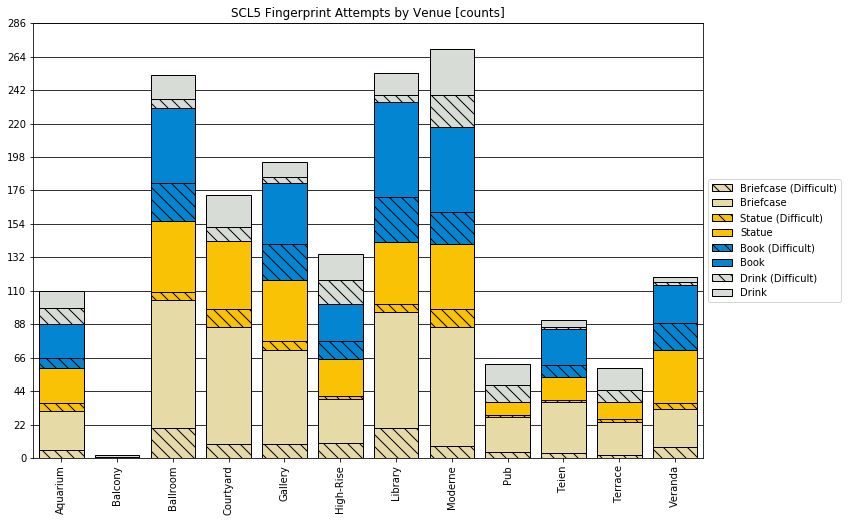

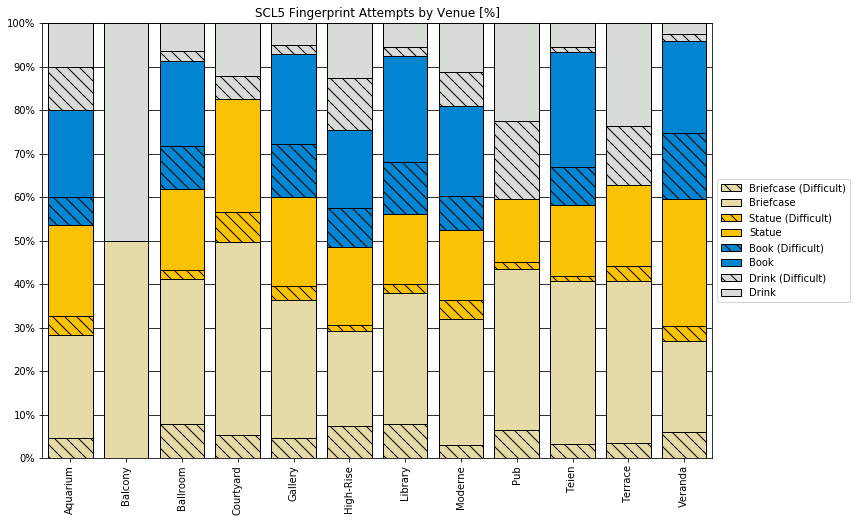

In [222]:
attempted_fingerprint_sources(
    scl5_replays,
    "SCL5 Fingerprint Attempts by Venue",
    groupby=lambda g: g.venue,
)

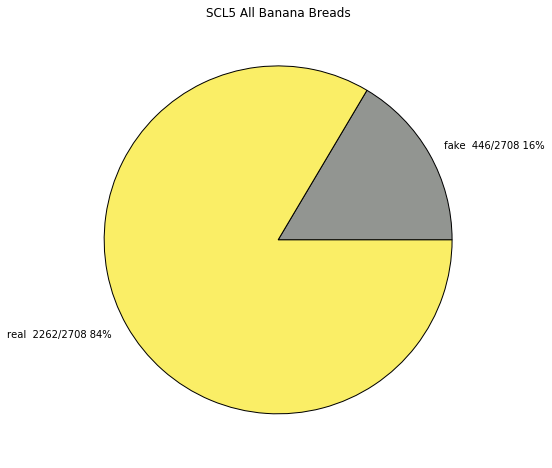

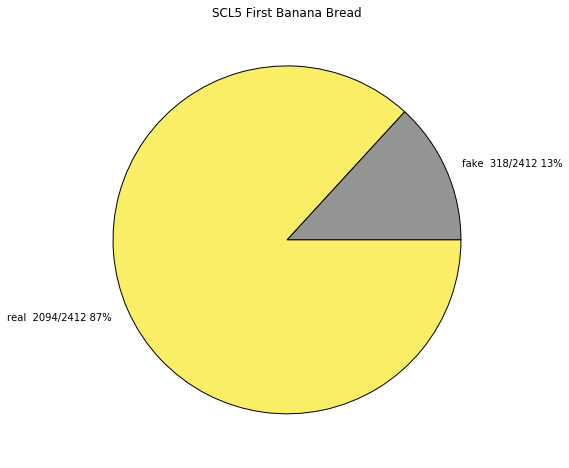

In [223]:
all_banana_bread_percentages(scl5_replays, "SCL5 All Banana Breads")
first_banana_bread_percentages(scl5_replays, "SCL5 First Banana Bread")

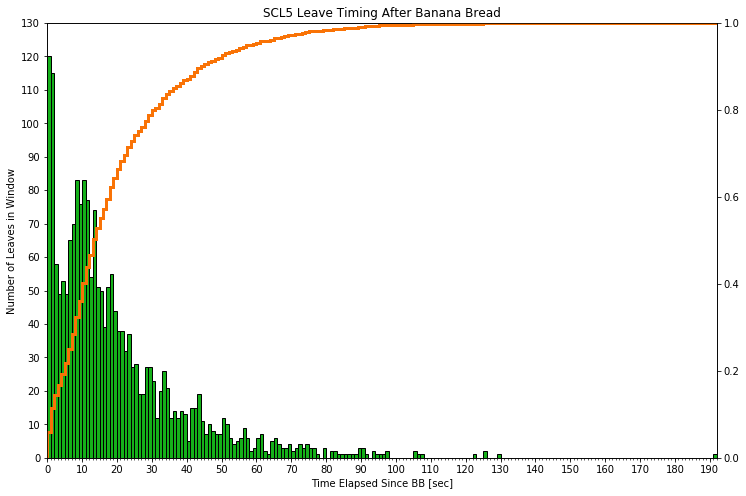

In [224]:
banana_split(scl5_replays, "SCL5 Leave Timing After Banana Bread")

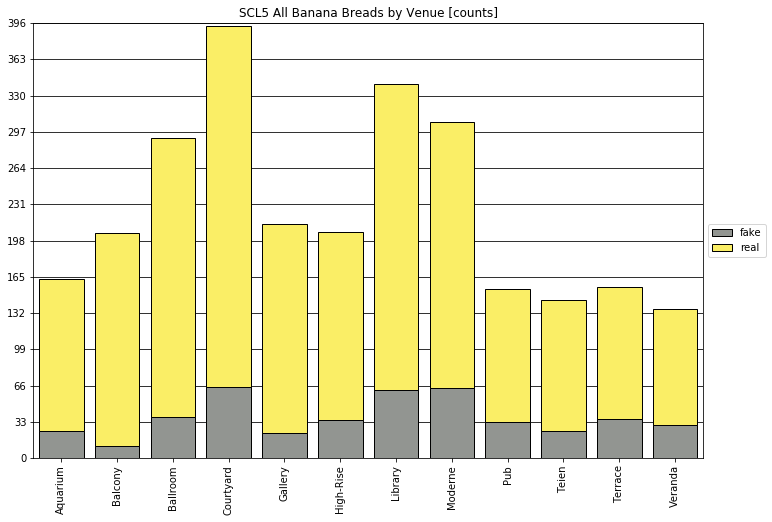

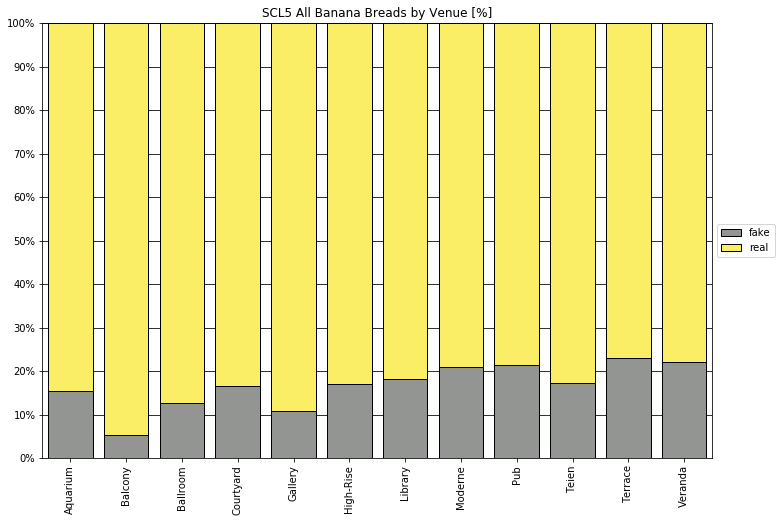

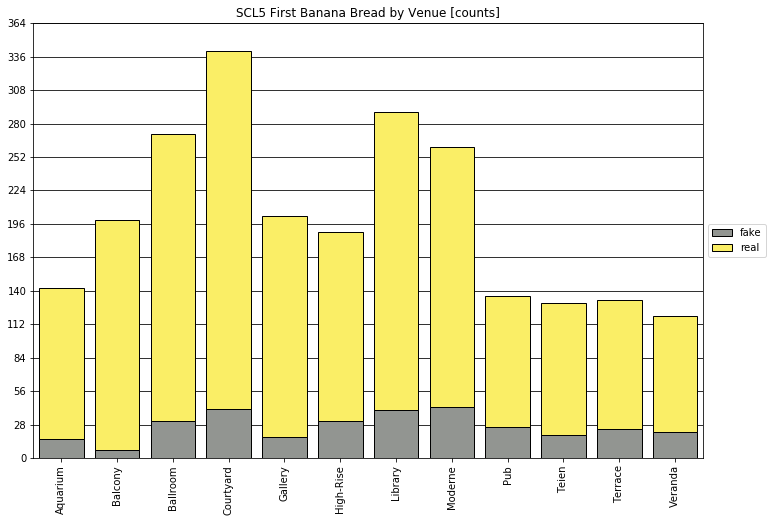

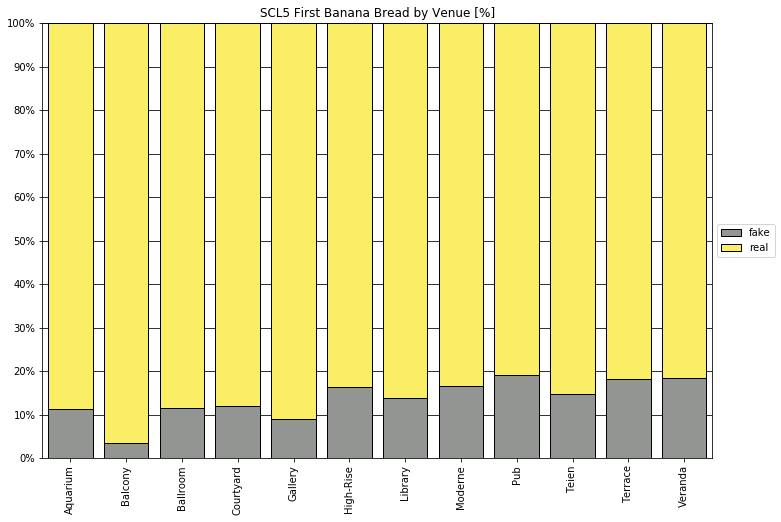

In [225]:
all_banana_bread_percentages(scl5_replays, "SCL5 All Banana Breads by Venue", groupby=lambda g: g.venue)
first_banana_bread_percentages(scl5_replays, "SCL5 First Banana Bread by Venue", groupby=lambda g: g.venue)

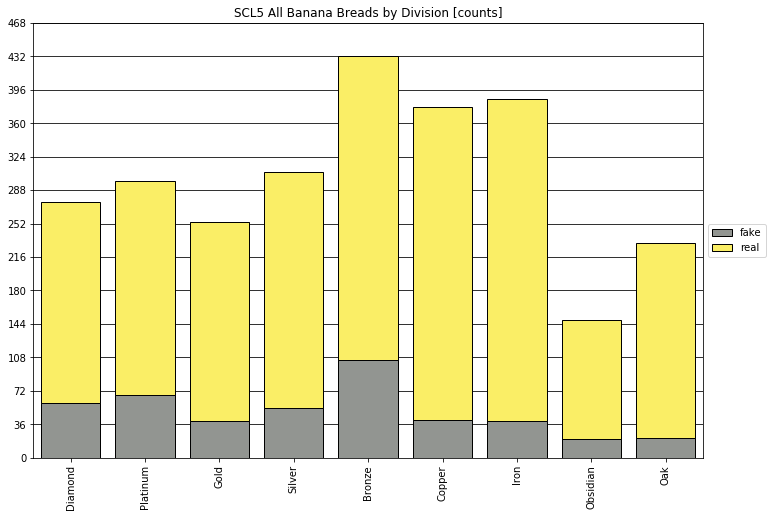

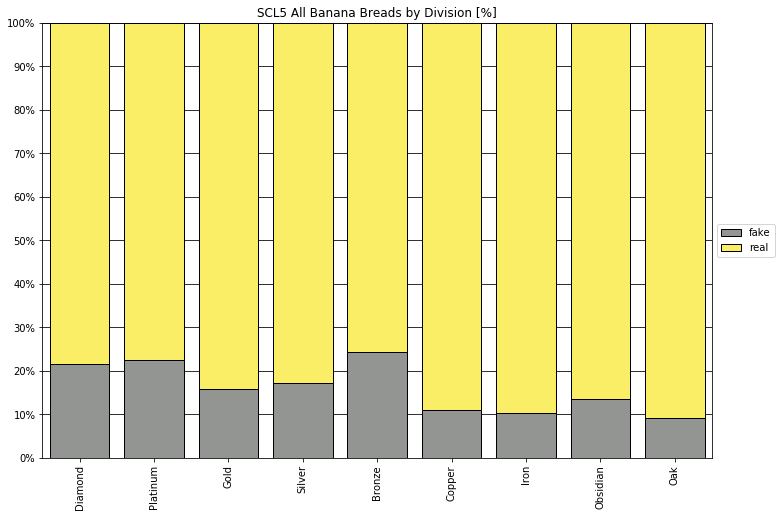

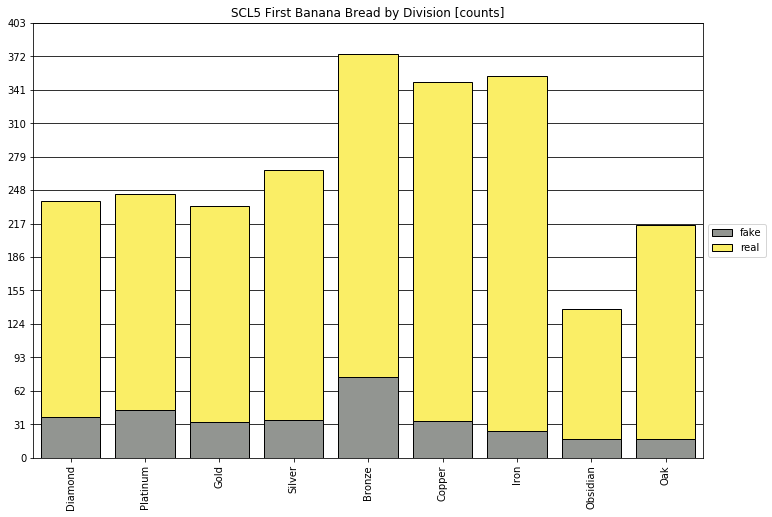

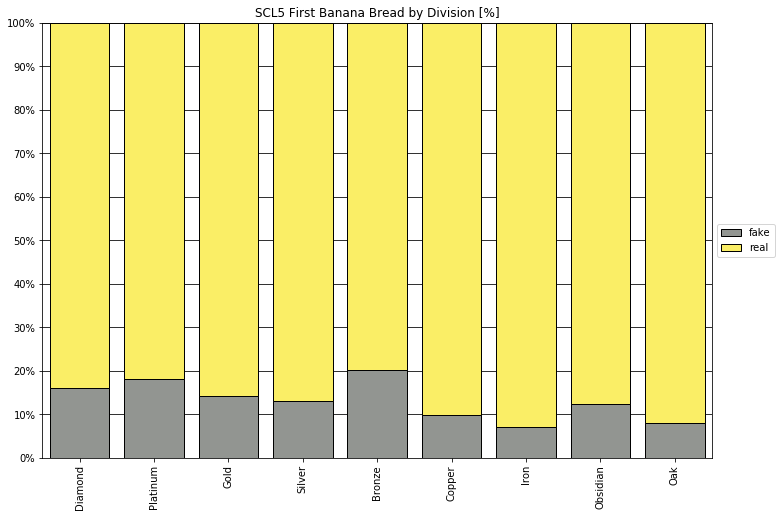

In [168]:
all_banana_bread_percentages(
    scl5_replays,
    "SCL5 All Banana Breads by Division",
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g)
)
first_banana_bread_percentages(
    scl5_replays,
    "SCL5 First Banana Bread by Division",
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g)
)

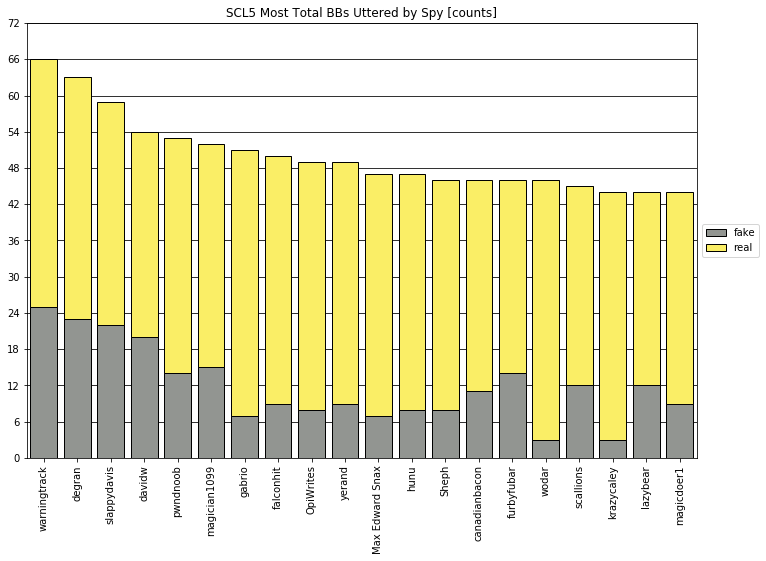

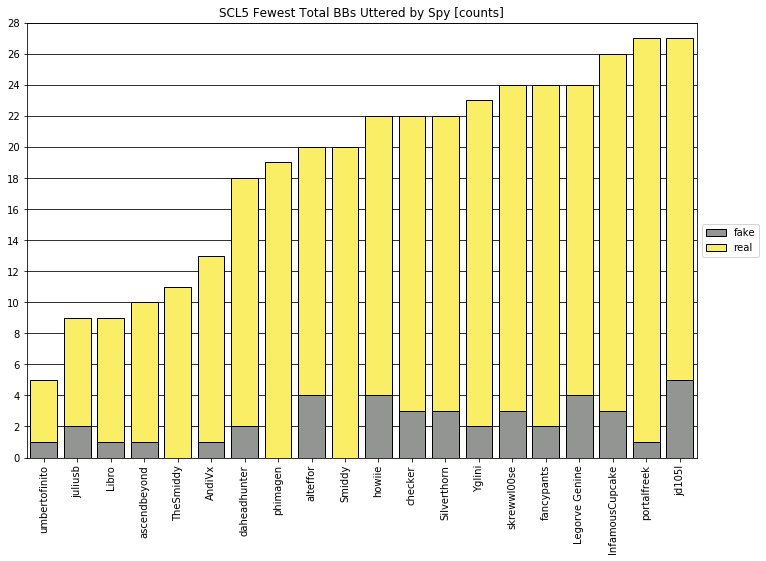

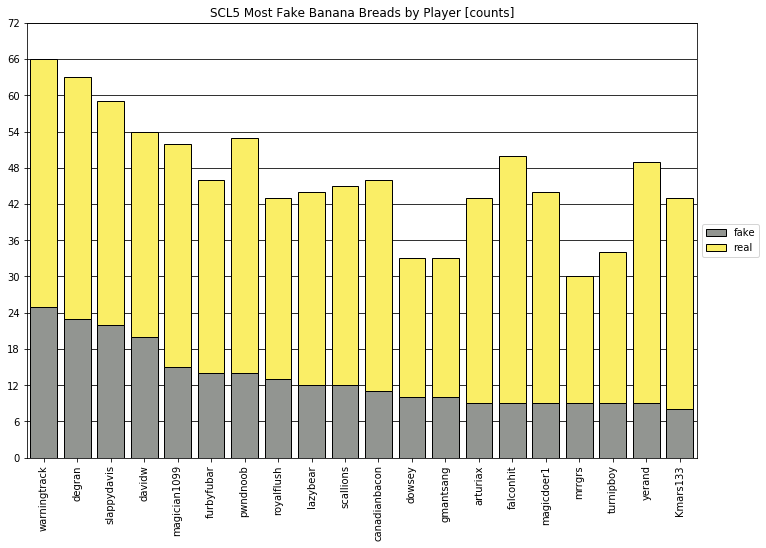

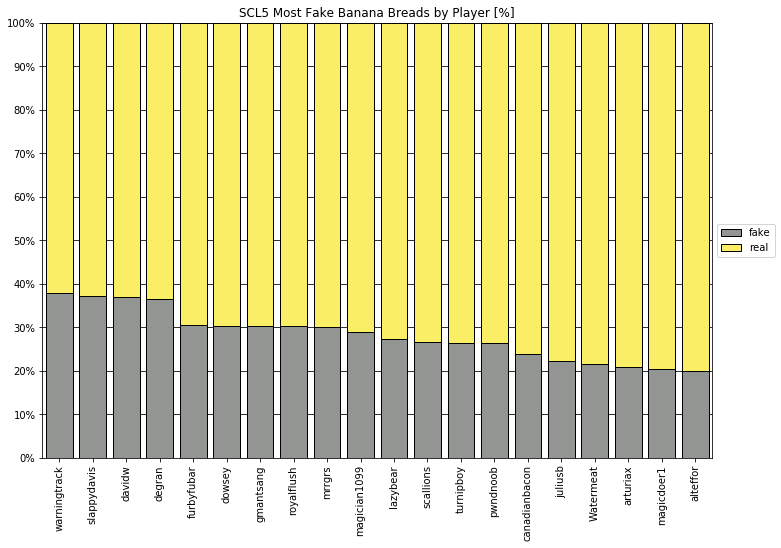

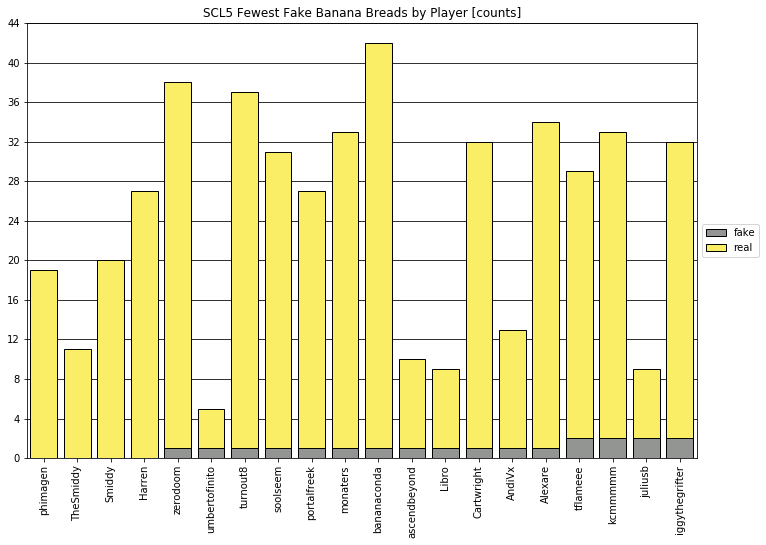

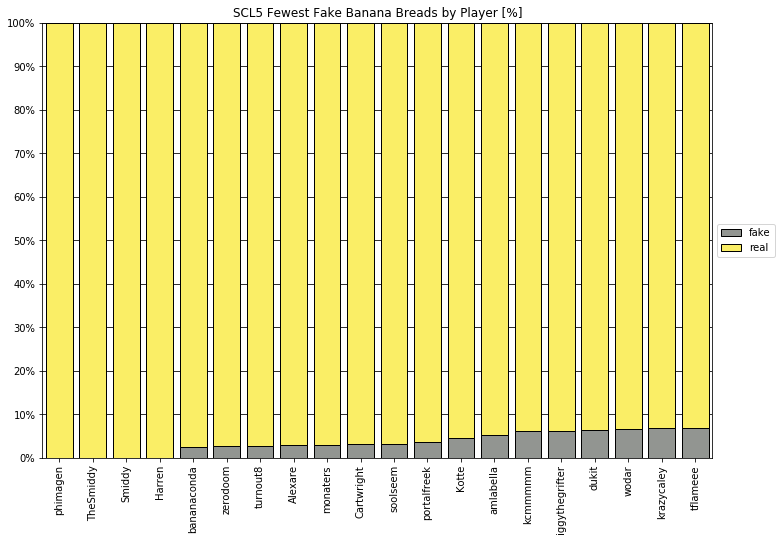

In [169]:
all_banana_bread_percentages(
    scl5_replays,
    'SCL5 Most Total BBs Uttered by Spy',
    groupby=lambda g: g.spy,
    category_data_order=sum,
    limit=20,
    percentile_plot=False
)
all_banana_bread_percentages(
    scl5_replays,
    'SCL5 Fewest Total BBs Uttered by Spy',
    groupby=lambda g: g.spy,
    category_data_order=sum,
    reversed_data_sort=True,
    limit=20,
    percentile_plot=False
)
all_banana_bread_percentages(
    scl5_replays,
    "SCL5 Most Fake Banana Breads by Player",
    groupby=lambda g: g.spy,
    category_data_order="fake",
    limit=20
)
all_banana_bread_percentages(
    scl5_replays,
    "SCL5 Fewest Fake Banana Breads by Player",
    groupby=lambda g: g.spy,
    category_data_order="fake",
    reversed_data_sort=True,
    limit=20
)

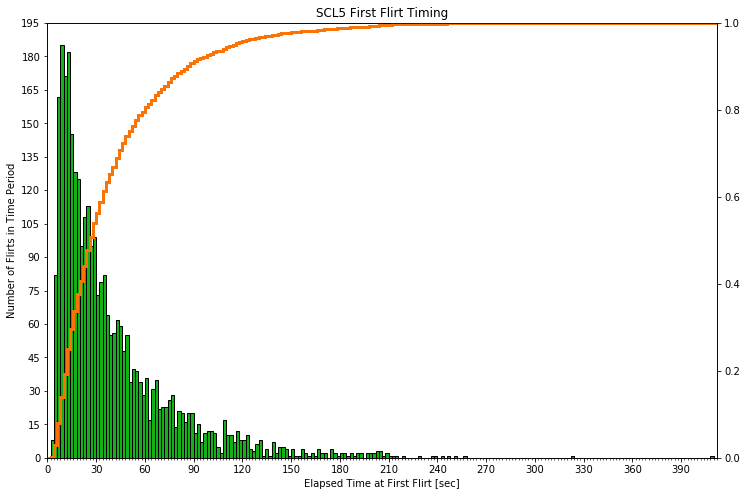

In [170]:
first_flirt_timing(scl5_replays, "SCL5 First Flirt Timing")

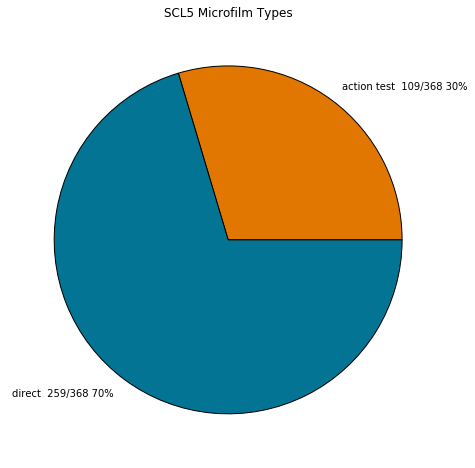

In [171]:
at_or_direct_mf(scl5_replays, "SCL5 Microfilm Types")

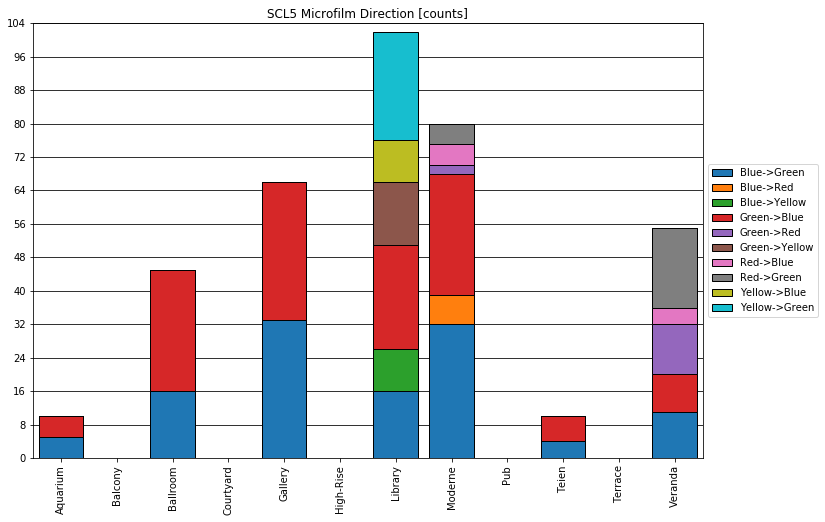

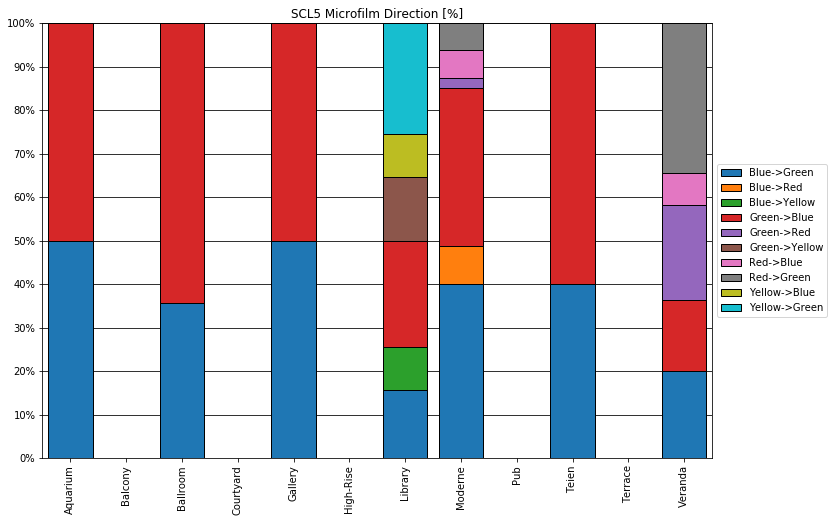

In [172]:
microfilm_direction(
    scl5_replays,
    "SCL5 Microfilm Direction",
    groupby=lambda g: g.venue,
)

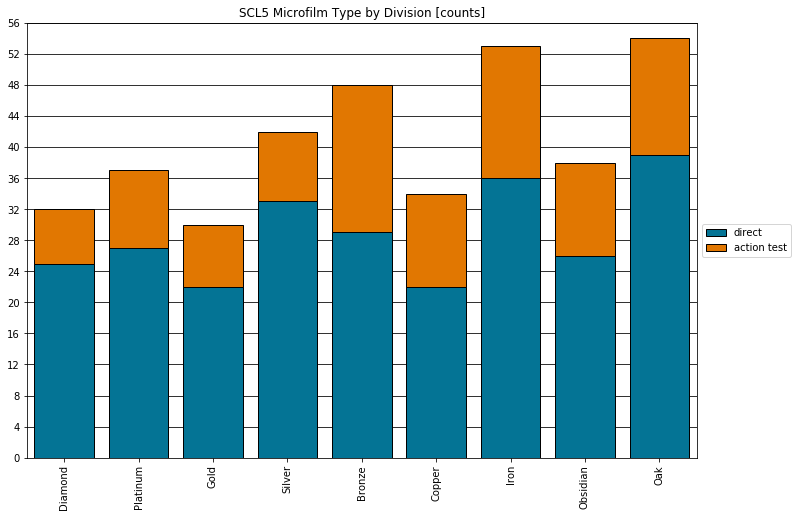

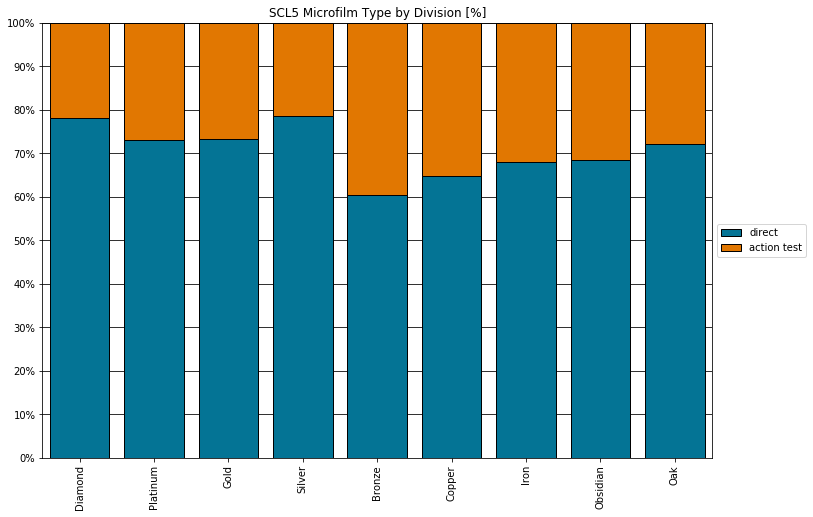

In [173]:
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Division',
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g),
)

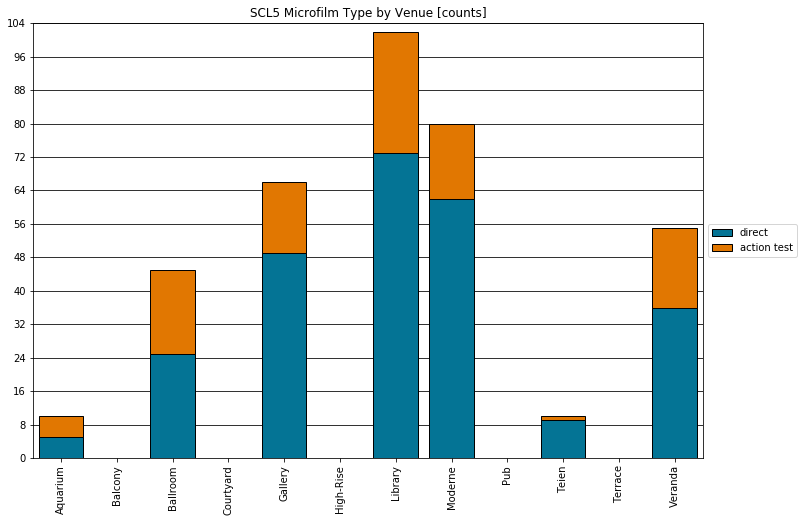

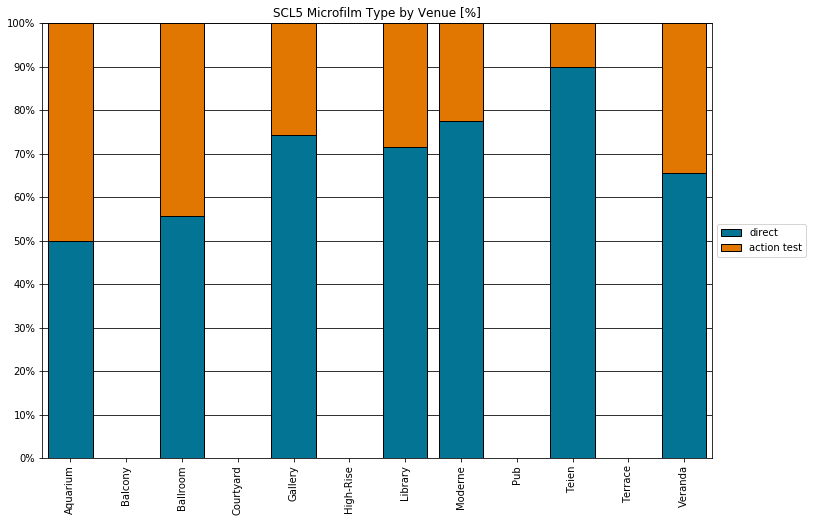

In [174]:
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Venue',
    groupby=lambda g: g.venue,
)

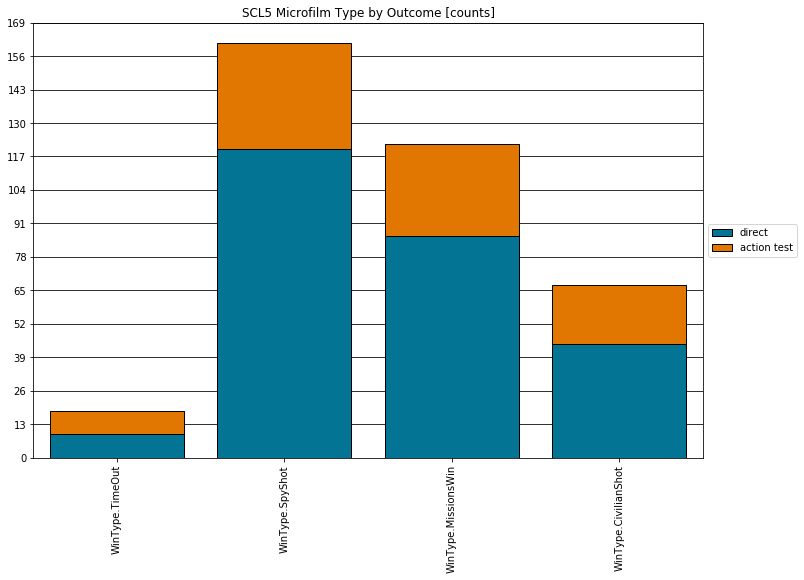

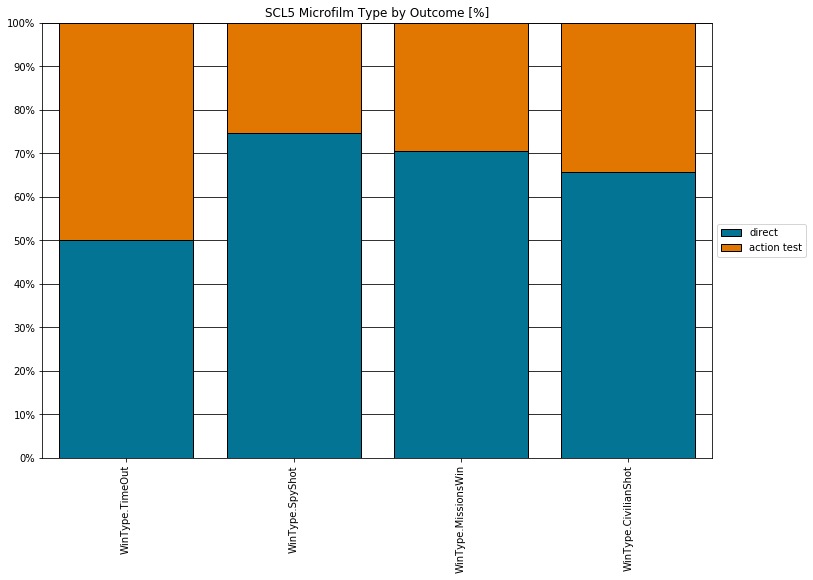

In [175]:
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Outcome',
    groupby=lambda g: g.win_type,
)

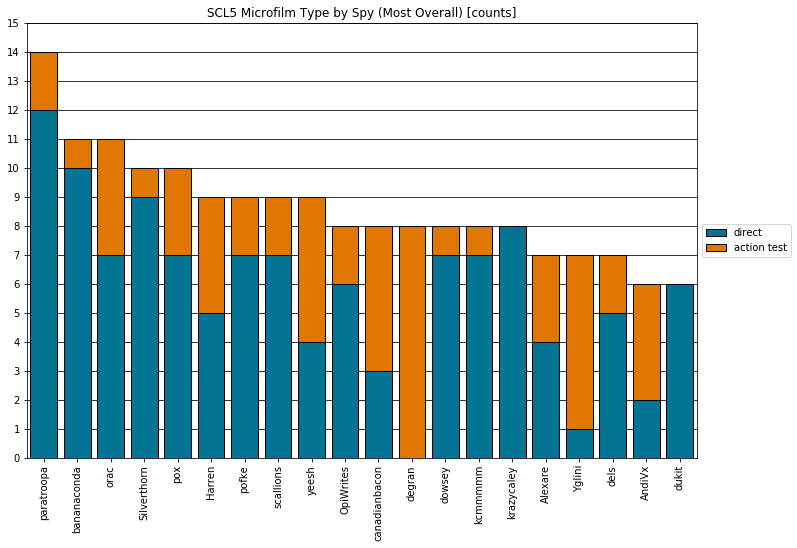

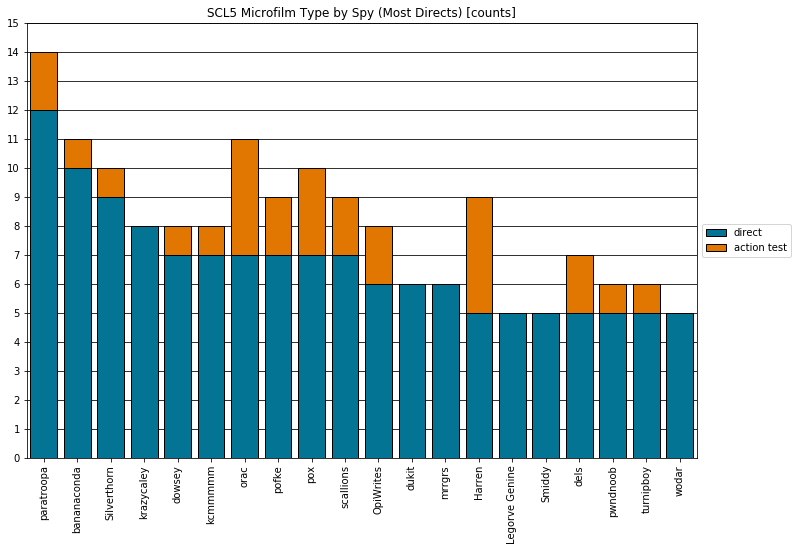

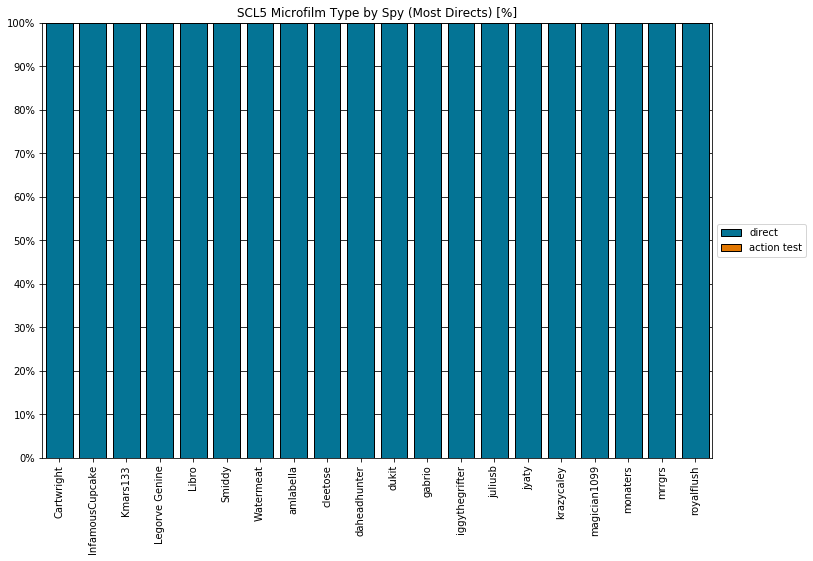

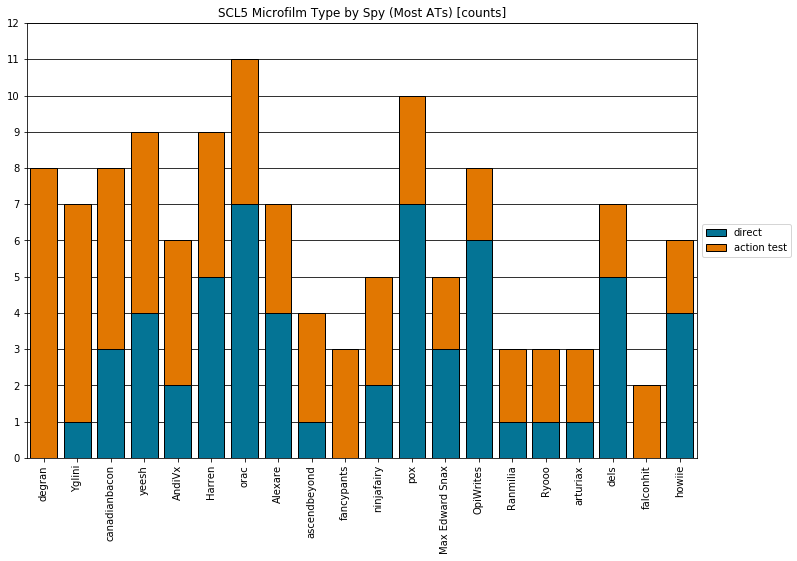

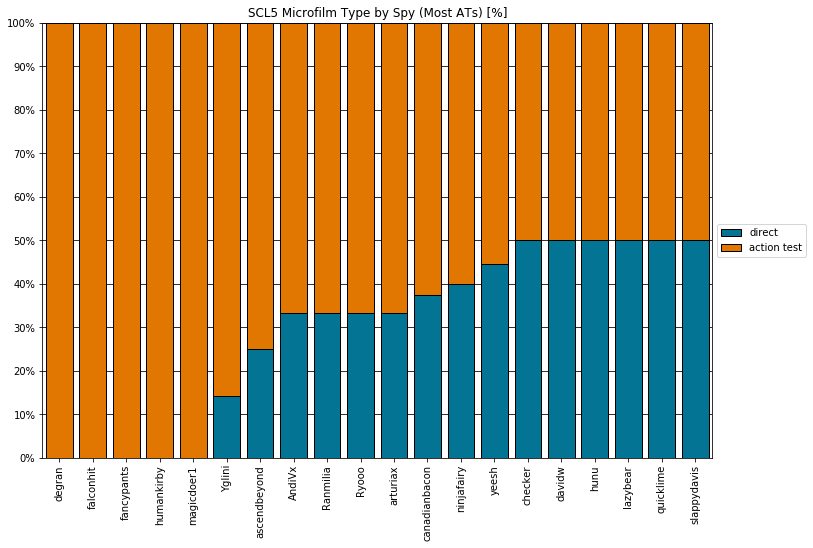

In [176]:
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Spy (Most Overall)',
    groupby=lambda g: g.spy,
    category_data_order=sum,
    percentile_plot=False,
    limit=20
)
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Spy (Most Directs)',
    groupby=lambda g: g.spy,
    category_data_order='direct',
    limit=20
)
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Spy (Most ATs)',
    groupby=lambda g: g.spy,
    category_data_order='action test',
    limit=20
)

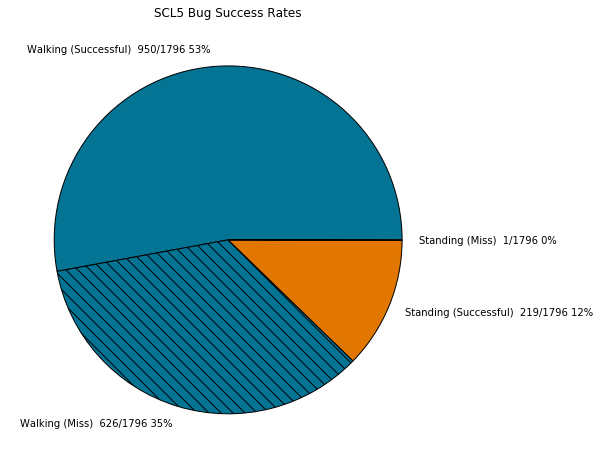

In [177]:
bug_success_rate(scl5_replays, "SCL5 Bug Success Rates")

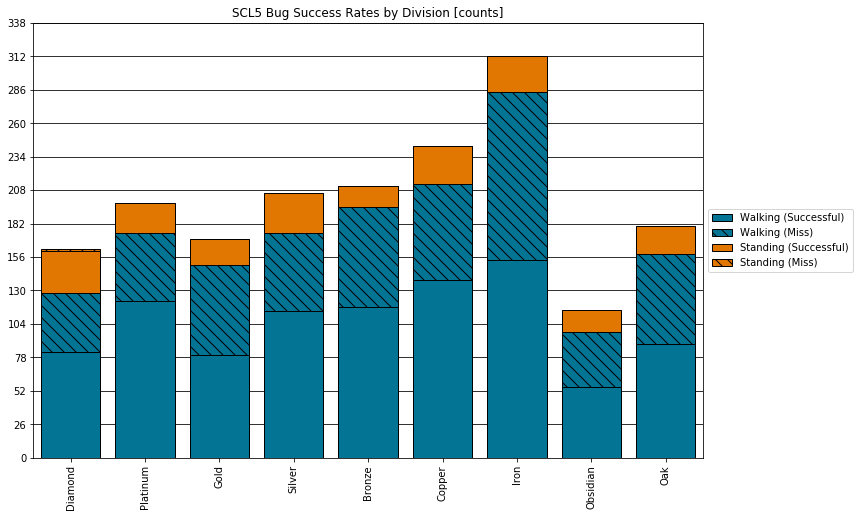

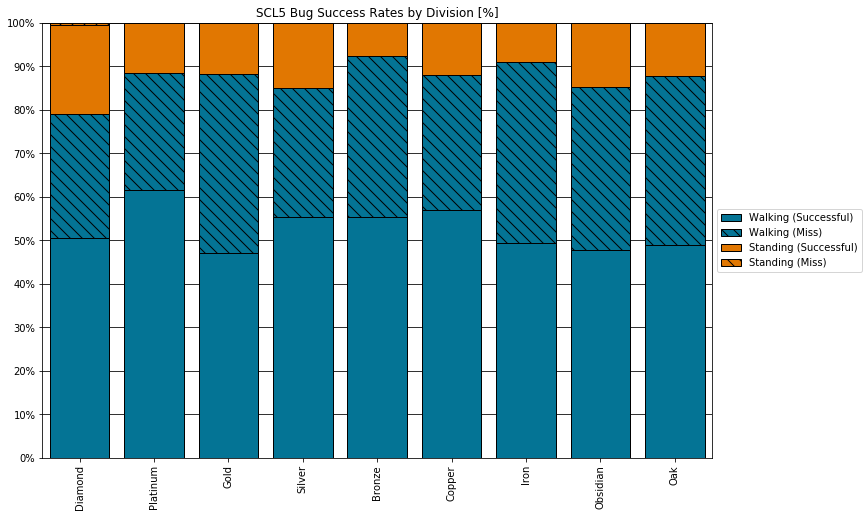

In [178]:
bug_success_rate(
    scl5_replays,
    'SCL5 Bug Success Rates by Division',
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g)
)

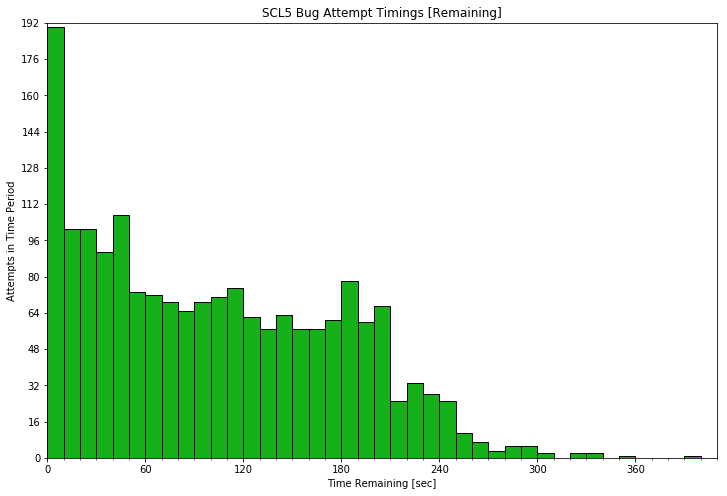

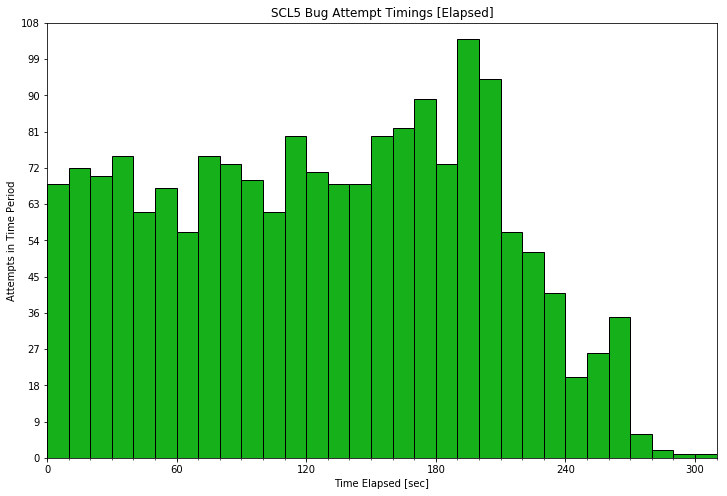

In [179]:
bug_attempt_timings(scl5_replays, "SCL5 Bug Attempt Timings")

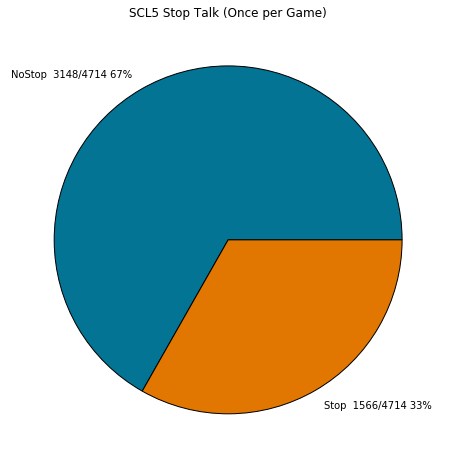

In [180]:
stop_talk_in_game_percentage(scl5_replays, "SCL5 Stop Talk (Once per Game)")

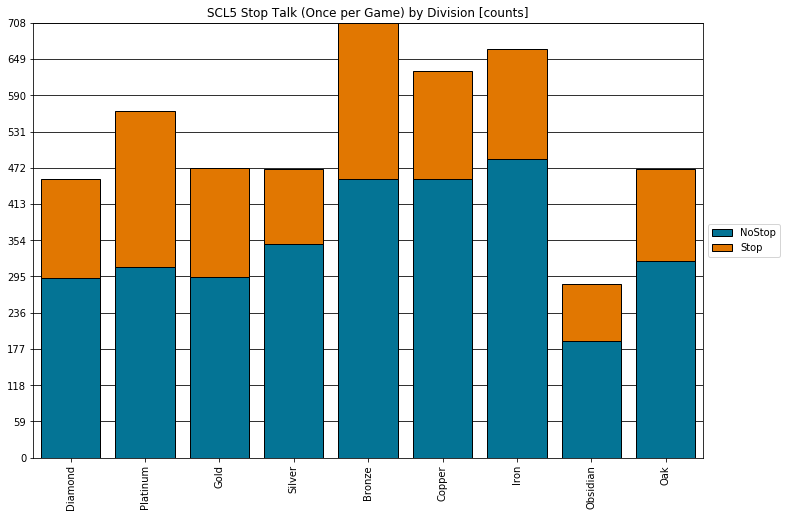

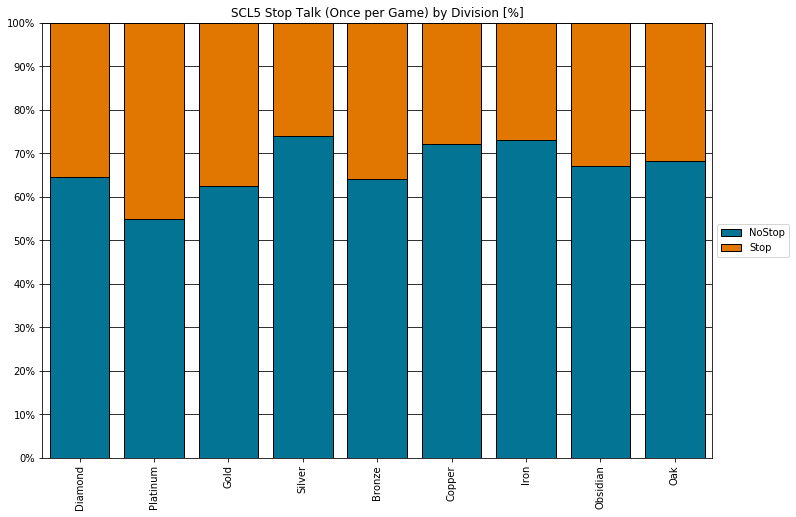

In [181]:
stop_talk_in_game_percentage(
    scl5_replays,
    'SCL5 Stop Talk (Once per Game) by Division',
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g)
)

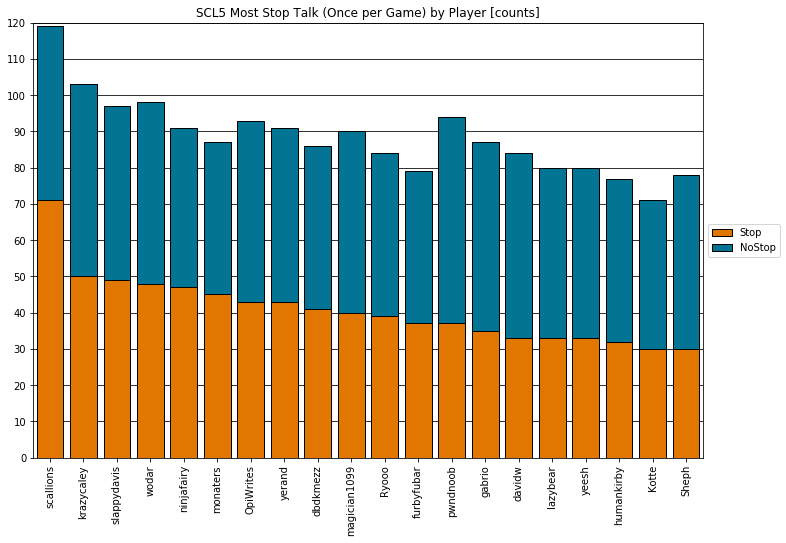

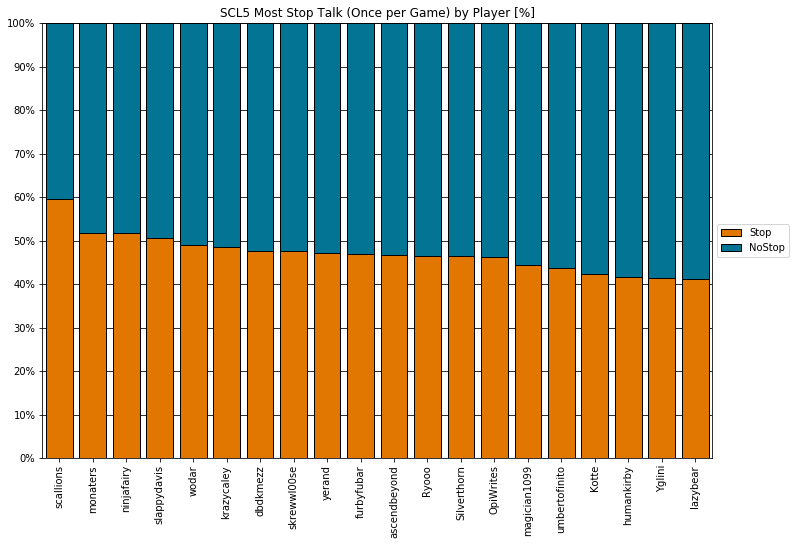

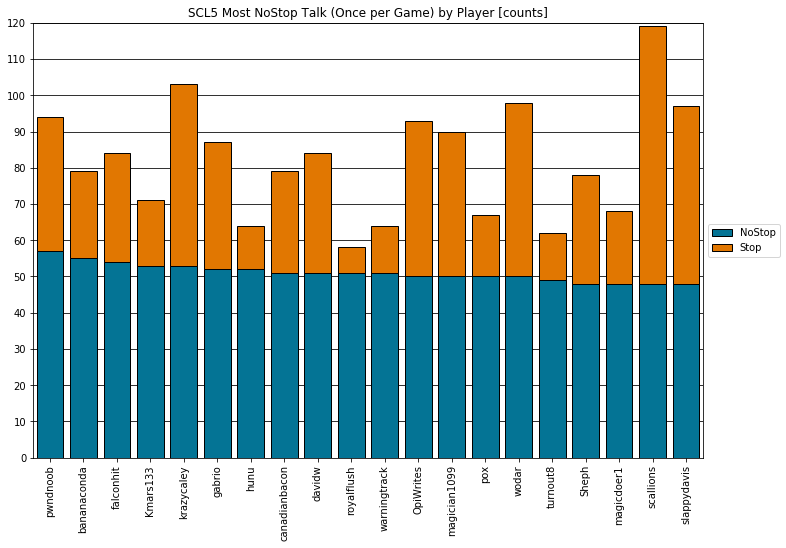

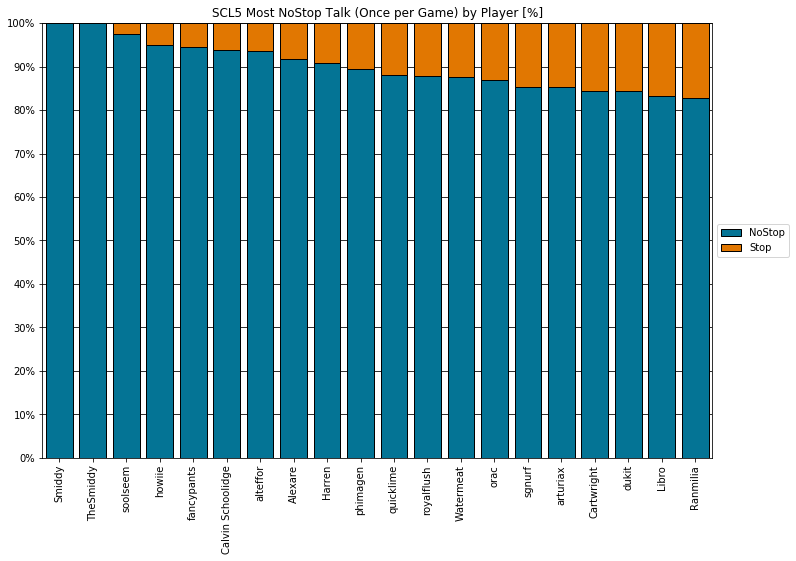

In [182]:
stop_talk_in_game_percentage(
    scl5_replays,
    'SCL5 Most Stop Talk (Once per Game) by Player',
    groupby=lambda g: g.spy,
    category_data_order='Stop',
    data_stack_order = ['Stop','NoStop'],
    limit=20
)
stop_talk_in_game_percentage(
    scl5_replays,
    'SCL5 Most NoStop Talk (Once per Game) by Player',
    groupby=lambda g: g.spy,
    category_data_order='NoStop',
    limit=20
)

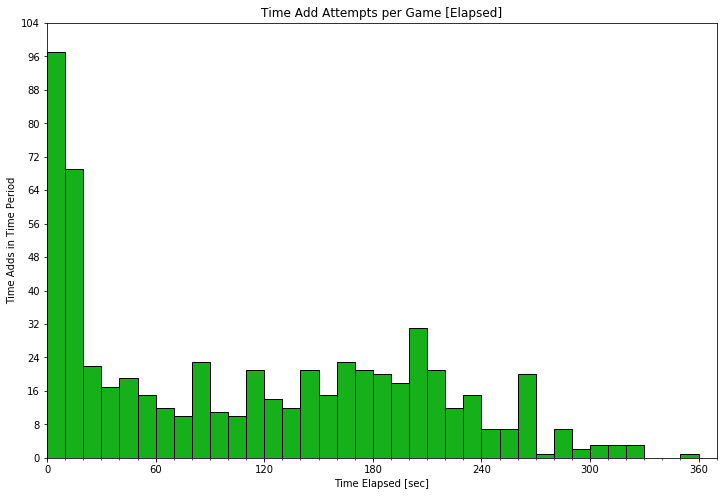

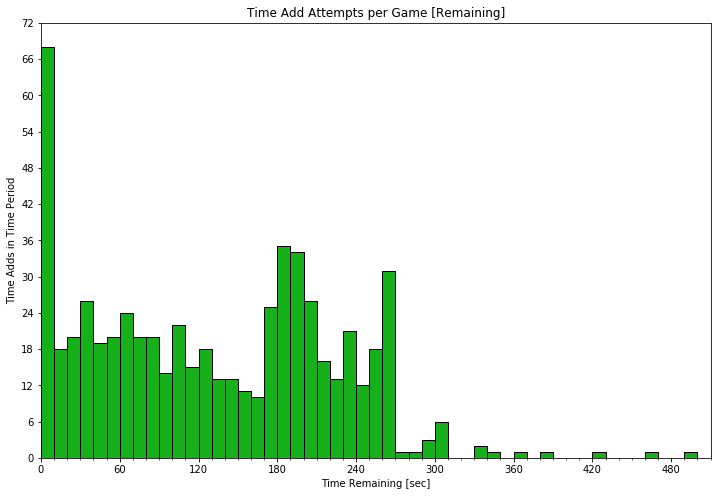

In [183]:
time_add_times(scl5_replays, "Time Add Attempts per Game")